<a href="https://colab.research.google.com/github/mohiddinyallur/3ev-Vehicles-breakdown-analysis/blob/main/3ev_breakdowns_FY24_25_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breakdowns analysis - FY 2024


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).





# Import libraries and load data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data=pd.read_csv('/content/drive/MyDrive/3ev-Data analytics /Breakdowns /April_1_2024-May_4_2025 breakdowns.csv')

In [66]:
data.head(10)

ID                vin RTO Registration Number            FOS  \
0   IR202505041  MD9B30CWWNB558330              KA53AA6329    Soukya Road   
1  IR2025050317  MD9B55CWWPF558893              KA53AB2665  Sahakar Nagar   
2  IR2025050316  MD9B55CWWPF558904              KA53AB2644  Sahakar Nagar   
3  IR2025050314  MD9B30CWWNE558470              KA53AA7935  Sahakar Nagar   
4  IR2025050313  MD9B30CWWND558393              KA53AA6126      Komapally   
5  IR2025050310  MD9B30CWWNF558529              MH04KX8319         Turbhe   
6   IR202505039  MBX0000ZBND286365              KA02AB3094      Alapakkam   
7   IR202505038  MD9B55CWWPD558878              KA53AB1650         Turbhe   
8   IR202505037  MD9B30CWWND558413              KA53AA6119      Alapakkam   
9   IR202505036  MD9B55CWWPD558760              KA53AB1325       Selaiyur   

   FON Incident Date  Incident Time  \
0  BLR   May 4, 2025           8.40   
1  BLR   May 3, 2025          13.41   
2  BLR   May 3, 2025          12.21   
3  BLR   May 3, 2025           8.26   
4  HYD   May 3, 2025           8.19   
5  MMB   May 3, 2025          10.59   
6  CHN   May 3, 2025          11.02   
7  MMB   May 3, 2025          10.59   
8  CHN   May 3, 2025          10.29   
9  CHN   May 3, 2025           8.11   

                                Incident Description Injury  \
0  this vehicle while in operation right side hea...    YES   
1                    This vehicle not moving issues     YES   
2  This vehicle not moving today towing this vehi...    YES   
3              This vehicle not moving  motor issue     YES   
4                                  Motor not working     NO   
5  Welding issue , brake issue , Font glass issue...    YES   
6  Mention vehicle was found york rod broken , So...    YES   
7                                 Door welding issue    YES   
8  Mention vehicle already 2 time incident report...    YES   
9  Vehicle not moving forward and reverse unable ...    YES   

                                      Injury Details  ... Damaged  \
0                                                 no  ...     YES   
1                                                 no  ...     YES   
2                                                 no  ...     YES   
3                                                 no  ...     YES   
4                                                NaN  ...     YES   
5                                                 Na  ...      NO   
6  Mention vehicle was found york rod broken , So...  ...      NO   
7                                                 Na  ...      NO   
8  Controller & Dashboard not fixing / Throttle a...  ...      NO   
9                                          no injury  ...      NO   

      Damage Details                                    Action Plan  \
0                 no                 Kindly check and fix this asap   
1                 no                need to resolve this issue asap   
2                 no                      need to resolve this asap   
3                 no                    need to resolve this issue    
4  Motor not working                                Need to repaire   
5                NaN                                 Need to fix it   
6                NaN          Kindly check and resolve the issue ,    
7                NaN                                 Need to fix it   
8                NaN        Kindly check and resolve the issue asap   
9                NaN  Informed service team to fix the problem asap   

  Incident Type    Status          Status Updated By Responsiblity  \
0      Accident  RESOLVED                  Mahesh RK          3eco   
1    Mechanical  RESOLVED                  Mahesh RK          3evi   
2    Mechanical  RESOLVED                  Mahesh RK          3evi   
3    Mechanical  RESOLVED                  Mahesh RK          3evi   
4    Mechanical   CREATED                        NaN          3evi   
5      Accident   CREATED                        NaN          3eco   
6    Mech

# Data wrangling and cleaning


Last 6 months data has been imported from Epro dashboard and has been cleaned in excel data model.


1.  Unnecessary columns have been removed
2.  calculated column FON is added , using Vlook up.
3.date outliers have been removed(2023, and march data synced incorrectly)







In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3916 entries, 0 to 3915
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3916 non-null   object 
 1   vin                      3916 non-null   object 
 2   RTO Registration Number  3916 non-null   object 
 3   FOS                      3916 non-null   object 
 4   FON                      3916 non-null   object 
 5   Incident Date            3916 non-null   object 
 6   Incident Time            3916 non-null   float64
 7   Incident Description     3916 non-null   object 
 8   Injury                   3916 non-null   object 
 9   Injury Details           1688 non-null   object 
 10  Vehicle Loaded           3916 non-null   object 
 11  Damaged                  3916 non-null   object 
 12  Damage Details           2146 non-null   object 
 13  Action Plan              3915 non-null   object 
 14  Incident Type           

In [10]:
data.describe()

Incident Time  Time of Closure
count    3916.000000      2003.000000
mean       11.761739        17.426086
std         3.731909         7.170272
min         0.000000         0.000000
25%         9.350000        15.590000
50%        11.200000        20.320000
75%        13.420000        22.440000
max        23.590000        23.590000

In [11]:
print(data.dtypes)

ID                          object
vin                         object
RTO Registration Number     object
FOS                         object
FON                         object
Incident Date               object
Incident Time              float64
Incident Description        object
Injury                      object
Injury Details              object
Vehicle Loaded              object
Damaged                     object
Damage Details              object
Action Plan                 object
Incident Type               object
Status                      object
Status Updated By           object
Responsiblity               object
Root Cause                  object
Date of Closure             object
Time of Closure            float64
dtype: object


In [69]:
# Convert 'Incident Date' and 'Date of Closure' to datetime objects
data['Incident Date'] = pd.to_datetime(data['Incident Date'])


In [68]:
data['Date of Closure'] = pd.to_datetime(data['Date of Closure'])


In [70]:
max(data['Incident Date'])

Timestamp('2025-05-04 00:00:00')

In [71]:
min(data['Incident Date'])

Timestamp('2023-06-30 00:00:00')

In [72]:
 #remove rows which are before 1 april 2024

from datetime import datetime
# Filter out rows before April 1, 2024
data = data[data['Incident Date'] >= datetime(2024, 4, 1)]


In [73]:
min(data['Incident Date'])

Timestamp('2024-04-01 00:00:00')

In [ ]:
# Count the rows where 'Status' is 'REJECTED'
rejected_count = data[data['Status'] == 'REJECTED'].shape[0]

# Print the count of rejected rows
print(rejected_count)

0


In [18]:
# remove the rows where column Status value is REJECTED

data = data[data['Status'] != 'REJECTED']


In [19]:
rejected_count = data[data['Status'] == 'REJECTED'].shape[0]

# Print the count of rejected rows
print(rejected_count)

0


In [20]:
# count incidents and group them by Incident Type

incident_counts = data.groupby('Incident Type')['Incident Type'].count()
print(incident_counts)


Incident Type
Accident       423
Electrical     279
Mechanical    3208
Name: Incident Type, dtype: int64


In [21]:
#rows with Incident Type as Minor issues

minor_issues_rows = data[data['Incident Type'] == 'Minor Issues'].shape[0]
print(minor_issues_rows)

0


In [22]:
# Remove row with Minor Issues

data = data[data['Incident Type'] != 'Minor Issues']


In [23]:
incident_counts = data.groupby('Incident Type')['Incident Type'].count()
print(incident_counts)

Incident Type
Accident       423
Electrical     279
Mechanical    3208
Name: Incident Type, dtype: int64


In [24]:
#  group count of ID by status, just print the Status and count of ids for that status

id_count_by_status = data.groupby('Status')['ID'].count()
print(id_count_by_status)


Status
CREATED        75
ESTIMATED       5
RESOLVED     3830
Name: ID, dtype: int64


# Data analysis and KPI's

# #AD-Hoc Analysis

<ipython-input-32-48e3f2ff8965>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month_Label'] = pd.Categorical(filtered_data['Month_Label'], categories=month_order, ordered=True)


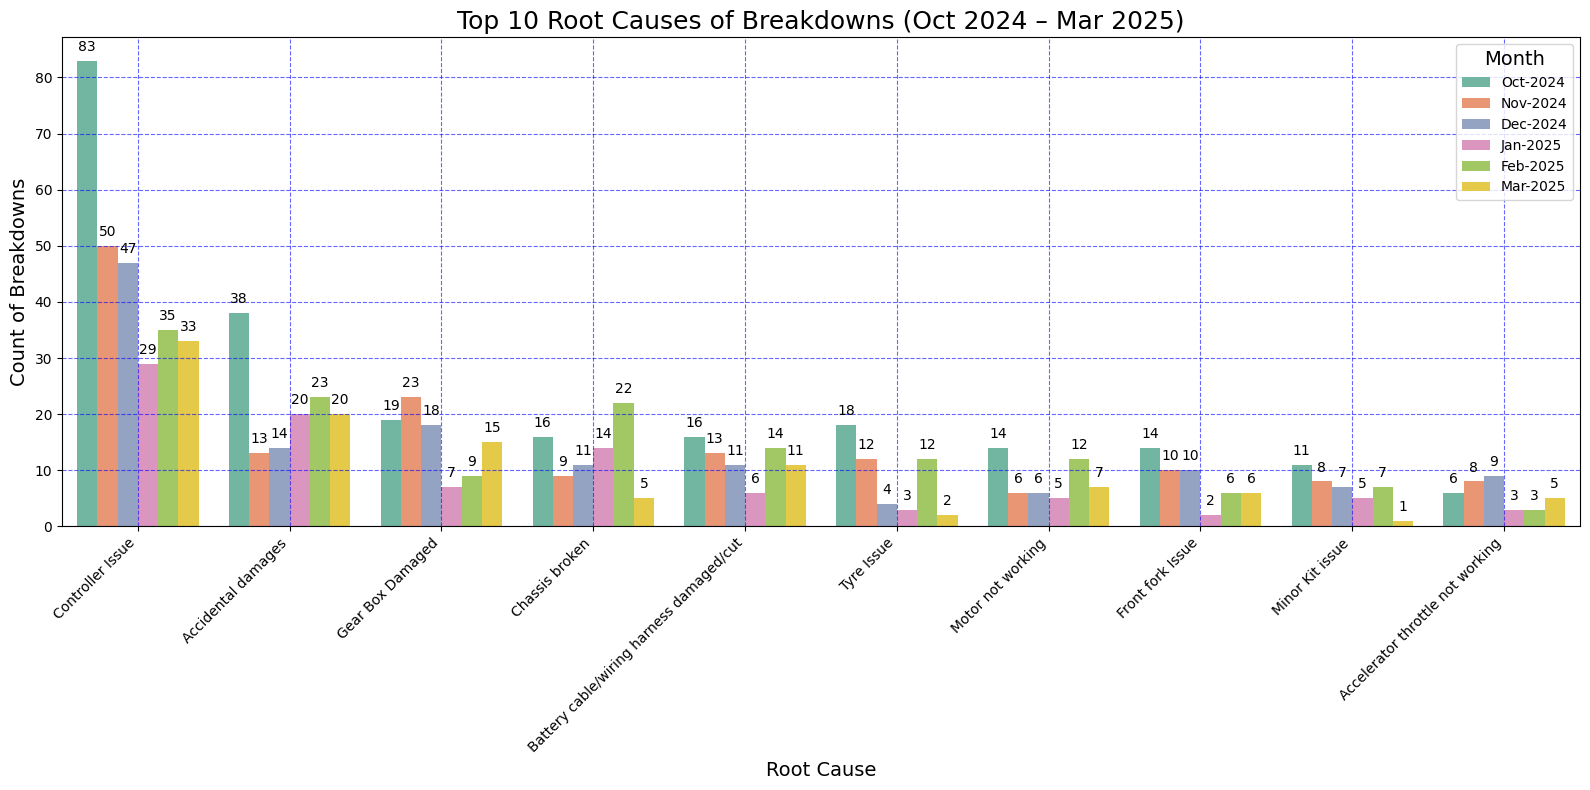

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'Incident Date' to datetime
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Filter data between Oct 2024 and Mar 2025
start_date = '2024-10-01'
end_date = '2025-03-31'
filtered = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)].copy()

# Extract Month as period and also string for hue
filtered['Month_Period'] = filtered['Incident Date'].dt.to_period('M')
filtered['Month_Label'] = filtered['Incident Date'].dt.strftime('%b-%Y')

# Group by root cause and month
breakdowns_by_rc_month = (
    filtered.groupby(['Root cause ', 'Month_Label'])['ID']
    .count()
    .reset_index()
)

# Get top 10 root causes across the filtered range
top_10_root_causes = (
    breakdowns_by_rc_month.groupby('Root cause ')['ID']
    .sum()
    .nlargest(10)
    .index
)

# Filter only top 10 root causes
filtered_data = breakdowns_by_rc_month[breakdowns_by_rc_month['Root cause '].isin(top_10_root_causes)]

# Order Root Cause by total count (descending)
root_cause_order = (
    filtered_data.groupby('Root cause ')['ID']
    .sum()
    .sort_values(ascending=False)
    .index
)

# Order months
month_order = ['Oct-2024', 'Nov-2024', 'Dec-2024', 'Jan-2025', 'Feb-2025', 'Mar-2025']
filtered_data['Month_Label'] = pd.Categorical(filtered_data['Month_Label'], categories=month_order, ordered=True)

# Set custom color palette (one color per month)
custom_palette = sns.color_palette("Set2", n_colors=6)  # 6 months

plt.figure(figsize=(16, 8))
ax = sns.barplot(
    data=filtered_data,
    x='Root cause ',
    y='ID',
    hue='Month_Label',
    order=root_cause_order,
    palette=custom_palette
)

# Add both horizontal and vertical grid lines (blue)
plt.grid(axis='y', linestyle='--', color='blue', alpha=0.6)
plt.grid(axis='x', linestyle='--', color='blue', alpha=0.6)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.xlabel('Root Cause', fontsize=14)
plt.ylabel('Count of Breakdowns', fontsize=14)
plt.title('Top 10 Root Causes of Breakdowns (Oct 2024 – Mar 2025)', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Month', title_fontsize=14)
plt.tight_layout()
plt.show()




In [ ]:
# prompt: rename column name Vehicle model to Vehicle model, write in original DB

# Assuming 'data' DataFrame is already loaded and processed as in the previous code.

# Rename the column 'Vehicle model' to 'Vehicle Model' directly in the DataFrame
data.rename(columns={'Vehicle model ': 'Vehicle Model'}, inplace=True)

# Now you can use the corrected column name 'Vehicle Model' in your analysis

# Example: Print the unique values in the 'Vehicle Model' column
print(data['Vehicle Model'].unique())


#To write the changes back to the original CSV file:
data.to_csv('/content/drive/MyDrive/3ev-Data analytics /Breakdowns /April_1_2024-April_20_5025 breakdowns.csv', index=False)


['Rhino' 'S8Ci' 'S8c' 'e30x' 'e30c' 'Vega-4' 'S8-mini']


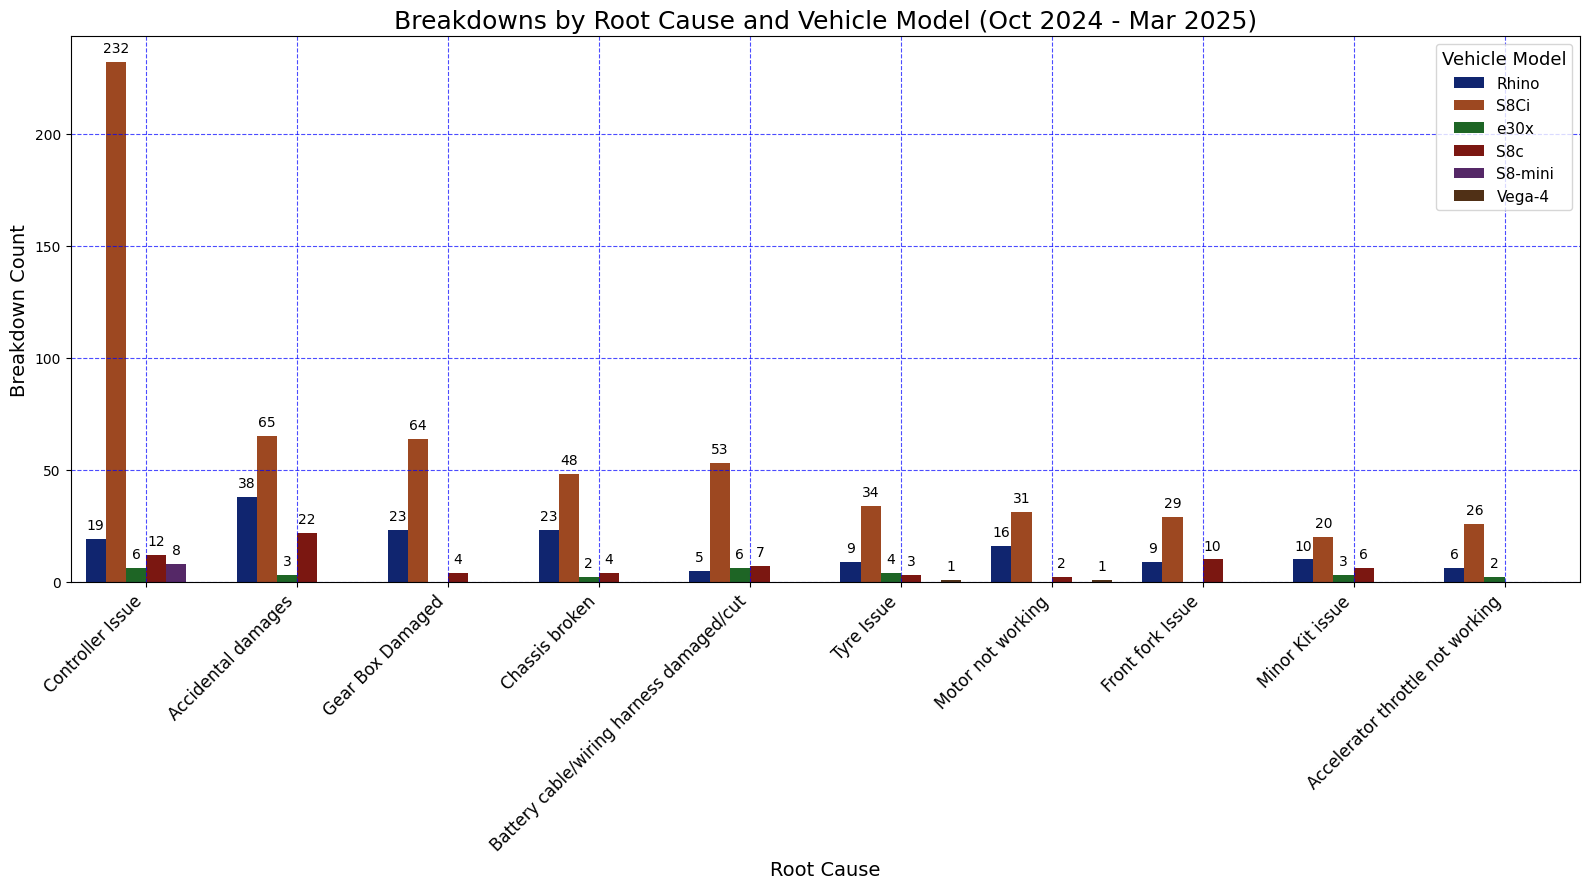

In [ ]:

# grahs for breakdowns vehicle model wise

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the last 6 months (Oct 2024 - Mar 2025)
start_date = '2024-10-01'
end_date = '2025-03-31'
filtered_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)].copy()

# Group by 'Root cause ' and 'Vehicle Model'
breakdowns_by_rc_model = filtered_data.groupby(['Root cause ', 'Vehicle Model'])['ID'].count().reset_index()

# Get top 10 root causes overall
top_10_root_causes = (
    breakdowns_by_rc_model.groupby('Root cause ')['ID']
    .sum().nlargest(10).index
)

# Filter to top 10 root causes
breakdowns_top_10 = breakdowns_by_rc_model[breakdowns_by_rc_model['Root cause '].isin(top_10_root_causes)]

# Order root causes by total breakdowns
root_cause_order = (
    breakdowns_top_10.groupby('Root cause ')['ID']
    .sum().sort_values(ascending=False).index
)

# Use dark color palette for vehicle models
num_models = breakdowns_top_10['Vehicle Model'].nunique()
dark_palette = sns.color_palette("dark", n_colors=num_models)

# Plot
plt.figure(figsize=(16, 9))
ax = sns.barplot(
    x='Root cause ',
    y='ID',
    hue='Vehicle Model',
    data=breakdowns_top_10,
    order=root_cause_order,
    palette=dark_palette
)

# Axis labels and title
plt.xlabel('Root Cause', fontsize=14, color='black')
plt.ylabel('Breakdown Count', fontsize=14, color='black')
plt.title('Breakdowns by Root Cause and Vehicle Model (Oct 2024 - Mar 2025)', fontsize=18, color='black')
plt.xticks(rotation=45, ha='right', fontsize=12, color='black')

# Blue grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7, color='blue')
plt.grid(axis='x', linestyle='--', alpha=0.7, color='blue')

# Add data labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=10, color='black',
            xytext=(0, 5), textcoords='offset points'
        )

plt.legend(title='Vehicle Model', title_fontsize=13, fontsize=11)
plt.tight_layout()
plt.show()




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3775 entries, 0 to 3780
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       3775 non-null   object        
 1   vin                      3775 non-null   object        
 2   RTO Registration Number  3775 non-null   object        
 3   Vehicle Model            3775 non-null   object        
 4   Vehicle Dispatch Date    2829 non-null   object        
 5   Vehicle status           3775 non-null   object        
 6   FOS                      3775 non-null   object        
 7   FON                      3775 non-null   object        
 8   Incident Date            3775 non-null   datetime64[ns]
 9   Incident Time            3775 non-null   float64       
 10  Incident Description     3775 non-null   object        
 11  Injury                   3775 non-null   object        
 12  Injury Details           1598 non-null 

In [ ]:
# prompt: rename the column Vehicle Dispatch Date to Vehicle_dispatch_date write it in original DB

# Rename the column 'Vehicle Dispatch Date' to 'Vehicle_dispatch_date'
data.rename(columns={'Vehicle Dispatch Date ': 'Vehicle_dispatch_date'}, inplace=True)

# Verify the change
print(data.columns)

#To write the changes back to the original CSV file:
data.to_csv('/content/drive/MyDrive/3ev-Data analytics /Breakdowns /April_1_2024-April_20_5025 breakdowns.csv', index=False)


Index(['ID', 'vin', 'RTO Registration Number', 'Vehicle Model',
       'Vehicle_dispatch_date', 'FOS', 'FON', 'Incident Date', 'Incident Time',
       'Incident Description', 'Injury', 'Injury Details', 'Vehicle Loaded',
       'Damaged', 'Damage Details', 'Action Plan', 'Incident Type', 'Status',
       'Status Updated By', 'Responsiblity', 'Root cause '],
      dtype='object')


In [ ]:
# prompt: convert Vehicle dispatch date to date format

import pandas as pd
# Convert 'Vehicle_dispatch_date' to datetime objects
data['Vehicle_dispatch_date'] = pd.to_datetime(data['Vehicle_dispatch_date'], errors='coerce')

# Display info to check for conversion success and null values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3781 entries, 0 to 3780
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       3781 non-null   object        
 1   vin                      3781 non-null   object        
 2   RTO Registration Number  3781 non-null   object        
 3   Vehicle Model            3781 non-null   object        
 4   Vehicle_dispatch_date    893 non-null    datetime64[ns]
 5   FOS                      3781 non-null   object        
 6   FON                      3781 non-null   object        
 7   Incident Date            3781 non-null   object        
 8   Incident Time            3781 non-null   float64       
 9   Incident Description     3781 non-null   object        
 10  Injury                   3781 non-null   object        
 11  Injury Details           1614 non-null   object        
 12  Vehicle Loaded           3781 non-

In [ ]:
# prompt: make all 3eco rows to be 3eco only , make it just 3eco and 3evi

# Assuming 'data' DataFrame is already loaded and processed.

# Replace '3ECO' with '3eco' in the 'Responsiblity' column
data['Responsiblity'] = data['Responsiblity'].replace(['3ECO'], '3eco')

# Filter out rows where 'Responsiblity' is not '3eco' or '3evi'
data = data[data['Responsiblity'].isin(['3eco', '3evi'])]

# Verify the changes
print(data['Responsiblity'].unique())

#To write the changes back to the original CSV file:
data.to_csv('/content/drive/MyDrive/3ev-Data analytics /Breakdowns /April_1_2024-April_20_5025 breakdowns.csv', index=False)

['3evi' '3eco']


In [ ]:
convert Vehicle_dispatch_date to date format


SyntaxError: invalid syntax (<ipython-input-110-e4083ad705e5>, line 1)

In [ ]:
# prompt: Calculate Vehicle Age:
# For each breakdown record, calculate the vehicle's age by comparing the Dispatch date to the current date or the date of the breakdown.
# If you have a vehicle_dispatch_date (the date the vehicle was dispatched), you can calculate the age of the vehicle.
# Categorize Vehicle by Vintage:
# Define the vintage categories based on the calculated age (in months). For example:
# 0-1M: 0-1 months old
# 1-3M: 1-3 months old
# 3-6M: 3-6 months old
# 6-9M: 6-9 months old
# 9-12M: 9-12 months old
# >12M: older than 12 months
# Assign Breakdown to Vintage Category:
# Once the vehicle's age is calculated, assign each breakdown to its corresponding vintage category.
# Trend Analysis:
# Group the breakdown data by vintage category and calculate trends such as:
# Breakdown frequency per vintage category.
# Total breakdowns over time.
# Any correlation between vintage and breakdown frequency.

# Assuming 'data' DataFrame is already loaded and processed as in the previous code.
# and the 'Vehicle_dispatch_date' column has been converted to datetime objects.

import pandas as pd

# Calculate vehicle age in months
data['Vehicle_Age_Months'] = (pd.to_datetime('today') - data['Vehicle_dispatch_date']).dt.days // 30

# Categorize vehicles by vintage
def categorize_vintage(age_months):
    if 0 <= age_months <= 1:
        return '0-1M'
    elif 1 < age_months <= 3:
        return '1-3M'
    elif 3 < age_months <= 6:
        return '3-6M'
    elif 6 < age_months <= 9:
        return '6-9M'
    elif 9 < age_months <= 12:
        return '9-12M'
    else:
        return '>12M'

data['Vehicle_Vintage'] = data['Vehicle_Age_Months'].apply(categorize_vintage)

# Trend Analysis: Breakdown frequency per vintage category
breakdown_frequency = data.groupby('Vehicle_Vintage')['ID'].count()
print("Breakdown Frequency by Vintage:\n", breakdown_frequency)

# Total breakdowns over time (you can adapt this based on your time granularity)
total_breakdowns_over_time = data.groupby(data['Incident Date'].dt.to_period('M'))['ID'].count()
print("\nTotal Breakdowns Over Time:\n", total_breakdowns_over_time)

# Correlation between vintage and breakdown frequency
correlation = data['Vehicle_Age_Months'].corr(data['ID']) # Replace 'ID' with your relevant breakdown count column
print(f"\nCorrelation between Vehicle Age (months) and Breakdown Count: {correlation}")

#Further analysis (example: plotting)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Vintage', data=data)
plt.title('Breakdown Frequency by Vehicle Vintage')
plt.xlabel('Vehicle Vintage Category')
plt.ylabel('Number of Breakdowns')
plt.show()


Breakdown Frequency by Vintage:
 Vehicle_Vintage
0-1M        7
1-3M       10
3-6M       37
6-9M       81
9-12M     367
>12M     3279
Name: ID, dtype: int64

Total Breakdowns Over Time:
 Incident Date
2023-06      1
2024-03      5
2024-04    338
2024-05    268
2024-06    229
2024-07    388
2024-08    459
2024-09    321
2024-10    395
2024-11    268
2024-12    241
2025-01    177
2025-02    274
2025-03    225
2025-04    192
Freq: M, Name: ID, dtype: int64


ValueError: could not convert string to float: 'IR202504199'

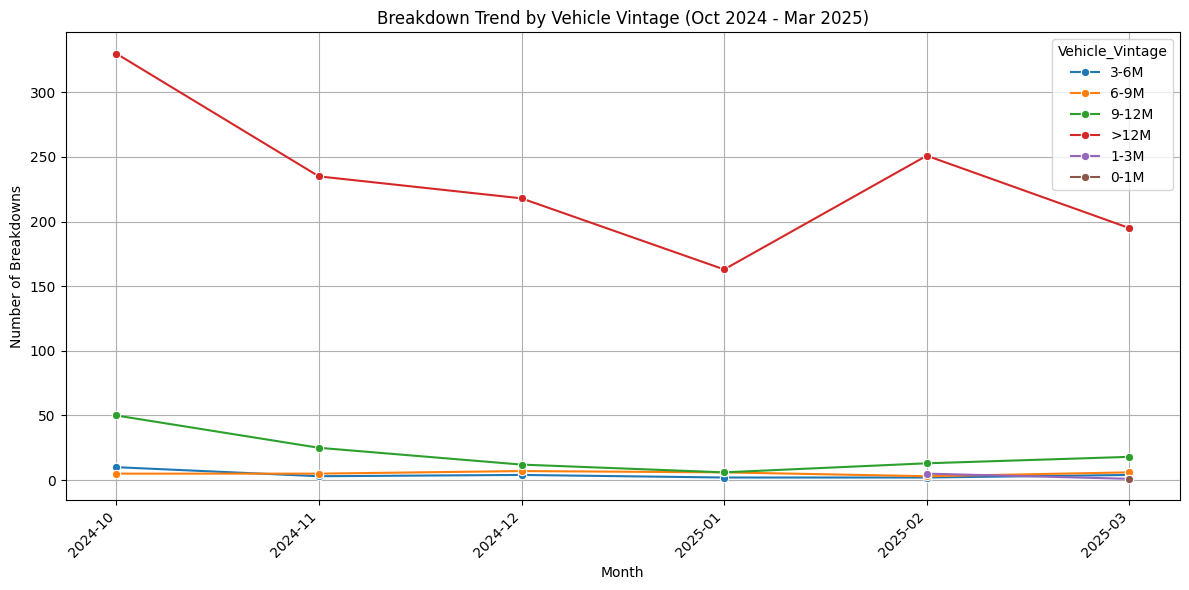

In [ ]:
# prompt: draft graph for last 6 months from above date (Oct 24 to March 25) by Vehicle_vintage

import matplotlib.pyplot as plt
# Assuming 'data' DataFrame is already loaded and processed as in the previous code.
# and the 'Vehicle_dispatch_date' column has been converted to datetime objects.
# and 'Vehicle_Vintage' column has been created

# Filter data for the last 6 months (Oct 2024 - Mar 2025)
start_date = '2024-10-01'
end_date = '2025-03-31'
filtered_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)].copy()


# Group by month and vehicle vintage
monthly_vintage_breakdowns = filtered_data.groupby([filtered_data['Incident Date'].dt.to_period('M'), 'Vehicle_Vintage'])['ID'].count().reset_index()


# Rename columns for clarity
monthly_vintage_breakdowns.rename(columns={'Incident Date': 'Month', 'ID': 'Breakdown_Count'}, inplace=True)

# Convert PeriodIndex to string for plotting
monthly_vintage_breakdowns['Month'] = monthly_vintage_breakdowns['Month'].astype(str)

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Breakdown_Count', hue='Vehicle_Vintage', data=monthly_vintage_breakdowns, marker='o')

plt.xlabel('Month')
plt.ylabel('Number of Breakdowns')
plt.title('Breakdown Trend by Vehicle Vintage (Oct 2024 - Mar 2025)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


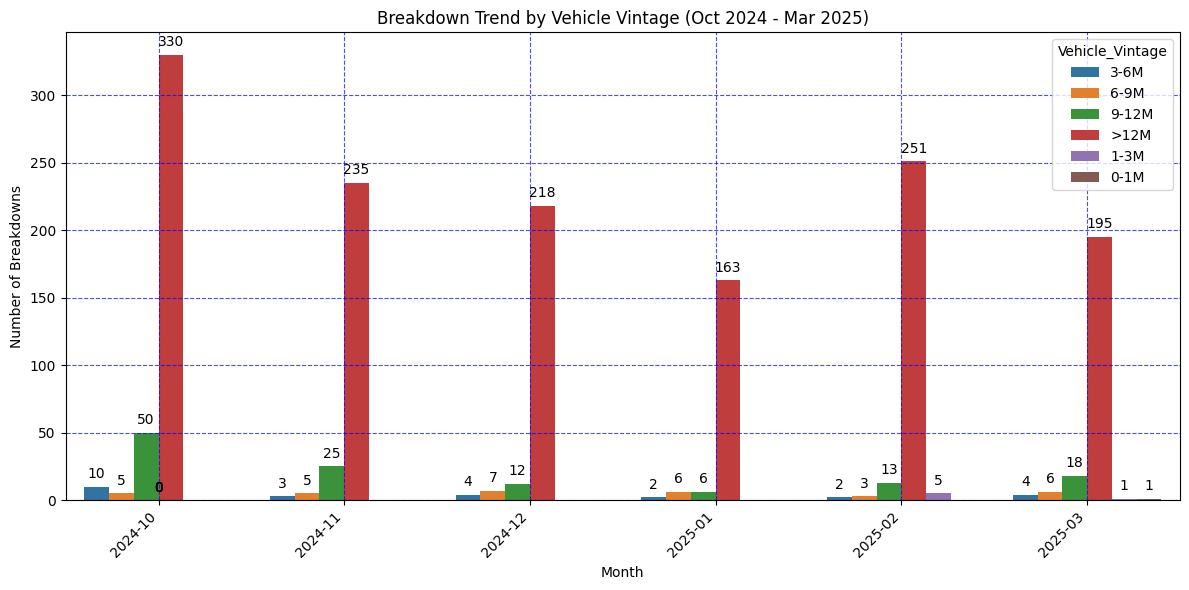

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and processed as in the previous code
# and the 'Vehicle_dispatch_date' column has been converted to datetime objects.
# and 'Vehicle_Vintage' column has been created

# Filter data for the last 6 months (Oct 2024 - Mar 2025)
start_date = '2024-10-01'
end_date = '2025-03-31'
filtered_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)].copy()

# Group by month and vehicle vintage
monthly_vintage_breakdowns = filtered_data.groupby([filtered_data['Incident Date'].dt.to_period('M'), 'Vehicle_Vintage'])['ID'].count().reset_index()

# Rename columns for clarity
monthly_vintage_breakdowns.rename(columns={'Incident Date': 'Month', 'ID': 'Breakdown_Count'}, inplace=True)

# Convert PeriodIndex to string for plotting
monthly_vintage_breakdowns['Month'] = monthly_vintage_breakdowns['Month'].astype(str)

# Create the bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Month', y='Breakdown_Count', hue='Vehicle_Vintage', data=monthly_vintage_breakdowns)

# Blue grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7, color='blue')
plt.grid(axis='x', linestyle='--', alpha=0.7, color='blue')



# Add data labels on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      fontsize = 10, color = 'black',
                      xytext = (0, 9), textcoords = 'offset points')

plt.xlabel('Month')
plt.ylabel('Number of Breakdowns')
plt.title('Breakdown Trend by Vehicle Vintage (Oct 2024 - Mar 2025)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# prompt: count Responsibility vaues

# Assuming 'data' DataFrame is already loaded and processed as in the previous code.

responsibility_counts = data.groupby('Responsiblity')['ID'].count()
responsibility_counts


Responsiblity
3eco      114
3eco      366
3evi     3301
Name: ID, dtype: int64

In [ ]:
# prompt: make rows to 3eco if they are matching value 3eco, keep 3evi as 3evi in Responsibility column

# Assuming 'data' DataFrame is already loaded and processed.

# Replace '3ECO' with '3eco' in the 'Responsiblity' column
data['Responsiblity'] = data['Responsiblity'].replace(['3eco '], '3eco')

#This line is not needed as we are filtering for '3eco' and '3evi' only below.
#data = data[data['Responsiblity'].isin(['3eco', '3evi'])]



# Verify the changes
print(data['Responsiblity'].unique())

#To write the changes back to the original CSV file:
data.to_csv('/content/drive/MyDrive/3ev-Data analytics /Breakdowns /April_1_2024-April_20_5025 breakdowns.csv', index=False)


['3evi' '3eco']


In [ ]:

responsibility_counts = data.groupby('Responsiblity')['ID'].count()
responsibility_counts

Responsiblity
3eco     480
3evi    3301
Name: ID, dtype: int64

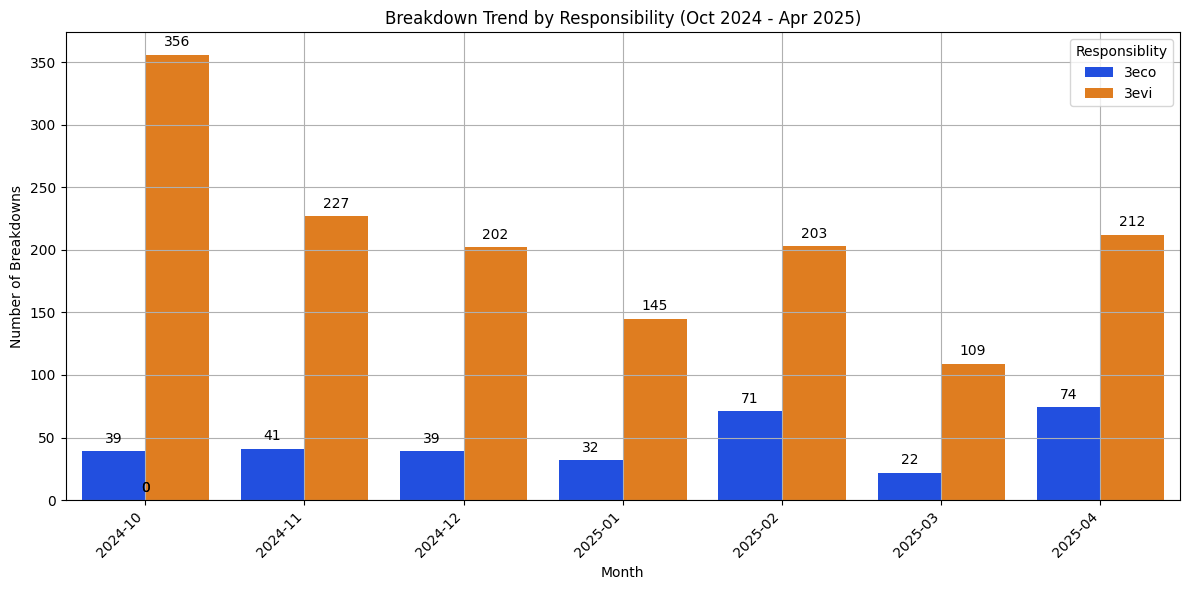

In [ ]:
# prompt: Draft bar graph for Responsibility of breakdowns for last 6 months (Oct 24 to March 25) with different colours

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and processed as in the provided code.
# and the 'Responsiblity' column has been cleaned (replace '3ECO' with '3eco', etc.)

# Filter data for the last 6 months (Oct 2024 - Mar 2025)
start_date = '2024-10-01'
end_date = '2025-04-30'
filtered_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)].copy()

# Group by month and responsibility
monthly_responsibility_breakdowns = filtered_data.groupby([filtered_data['Incident Date'].dt.to_period('M'), 'Responsiblity'])['ID'].count().reset_index()

# Rename columns for clarity
monthly_responsibility_breakdowns.rename(columns={'Incident Date': 'Month', 'ID': 'Breakdown_Count'}, inplace=True)

# Convert PeriodIndex to string for plotting
monthly_responsibility_breakdowns['Month'] = monthly_responsibility_breakdowns['Month'].astype(str)

# Define a custom color palette for better visualization
custom_palette = sns.color_palette("bright", n_colors=len(monthly_responsibility_breakdowns['Responsiblity'].unique()))


# Create the bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Month', y='Breakdown_Count', hue='Responsiblity', data=monthly_responsibility_breakdowns, palette=custom_palette)



# Add data labels on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      fontsize = 10, color = 'black',
                      xytext = (0, 9), textcoords = 'offset points')

plt.xlabel('Month')
plt.ylabel('Number of Breakdowns')
plt.title('Breakdown Trend by Responsibility (Oct 2024 - Apr 2025)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# prompt: make all 3eco rows to be 3eco only , make it just 3eco and 3evi

# Assuming 'data' DataFrame is already loaded and processed.

# Replace '3ECO' with '3eco' in the 'Responsiblity' column
data['Responsiblity'] = data['Responsiblity'].replace(['3ECO'], '3eco')

# Filter out rows where 'Responsiblity' is not '3eco' or '3evi'
data = data[data['Responsiblity'].isin(['3eco', '3evi'])]

# Verify the changes
print(data['Responsiblity'].unique())

#To write the changes back to the original CSV file:
data.to_csv('/content/drive/MyDrive/3ev-Data analytics /Breakdowns /April_1_2024-April_20_5025 breakdowns.csv', index=False)


['3evi' '3eco']


In [ ]:
# prompt: use above data and draft bar graphs for Responsibility with two different colours  for last 6 months , Oct 24 to March 25

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded and processed as in the previous code.
# and the necessary columns ('Responsiblity', 'Incident Date') are available.

# Filter data for the last 6 months (Oct 2024 - Mar 2025)
start_date = '2024-10-01'
end_date = '2025-03-31'
filtered_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)].copy()

# Group by month and responsibility
monthly_responsibility_breakdowns = filtered_data.groupby([filtered_data['Incident Date'].dt.to_period('M'), 'Responsiblity'])['ID'].count().reset_index()

# Rename columns for clarity
monthly_responsibility_breakdowns.rename(columns={'Incident Date': 'Month', 'ID': 'Breakdown_Count'}, inplace=True)

# Convert PeriodIndex to string for plotting
monthly_responsibility_breakdowns['Month'] = monthly_responsibility_breakdowns['Month'].astype(str)


# Define custom color palette for responsibilities
colors = ['skyblue', 'lightcoral']

# Order months
month_order = ['2024-10', '2024-11', '2024-12', '2025-01', '2025-02', '2025-03']
monthly_responsibility_breakdowns['Month'] = pd.Categorical(monthly_responsibility_breakdowns['Month'], categories=month_order, ordered=True)


# Create the bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Month', y='Breakdown_Count', hue='Responsiblity', data=monthly_responsibility_breakdowns, palette=colors)

# Add data labels on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      fontsize=10, color='black',
                      xytext=(0, 9), textcoords='offset points')

plt.xlabel('Month',fontsize=12, color='black')
plt.ylabel('Number of Breakdowns',fontsize=12, color='black')
plt.title('Breakdown Trend by Responsibility (Oct 2024 - Mar 2025)', fontsize=14, color='black')
plt.xticks(rotation=45, ha='right',fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)
plt.tight_layout()
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

<ipython-input-94-1d878c87e2e5>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_responsibility_breakdowns = filtered_data.groupby(['Month_Label', 'Responsiblity'])['ID'].count().reset_index()
<ipython-input-94-1d878c87e2e5>:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Responsibility', bbox_to_anchor=(1.05, 1), loc='upper left')


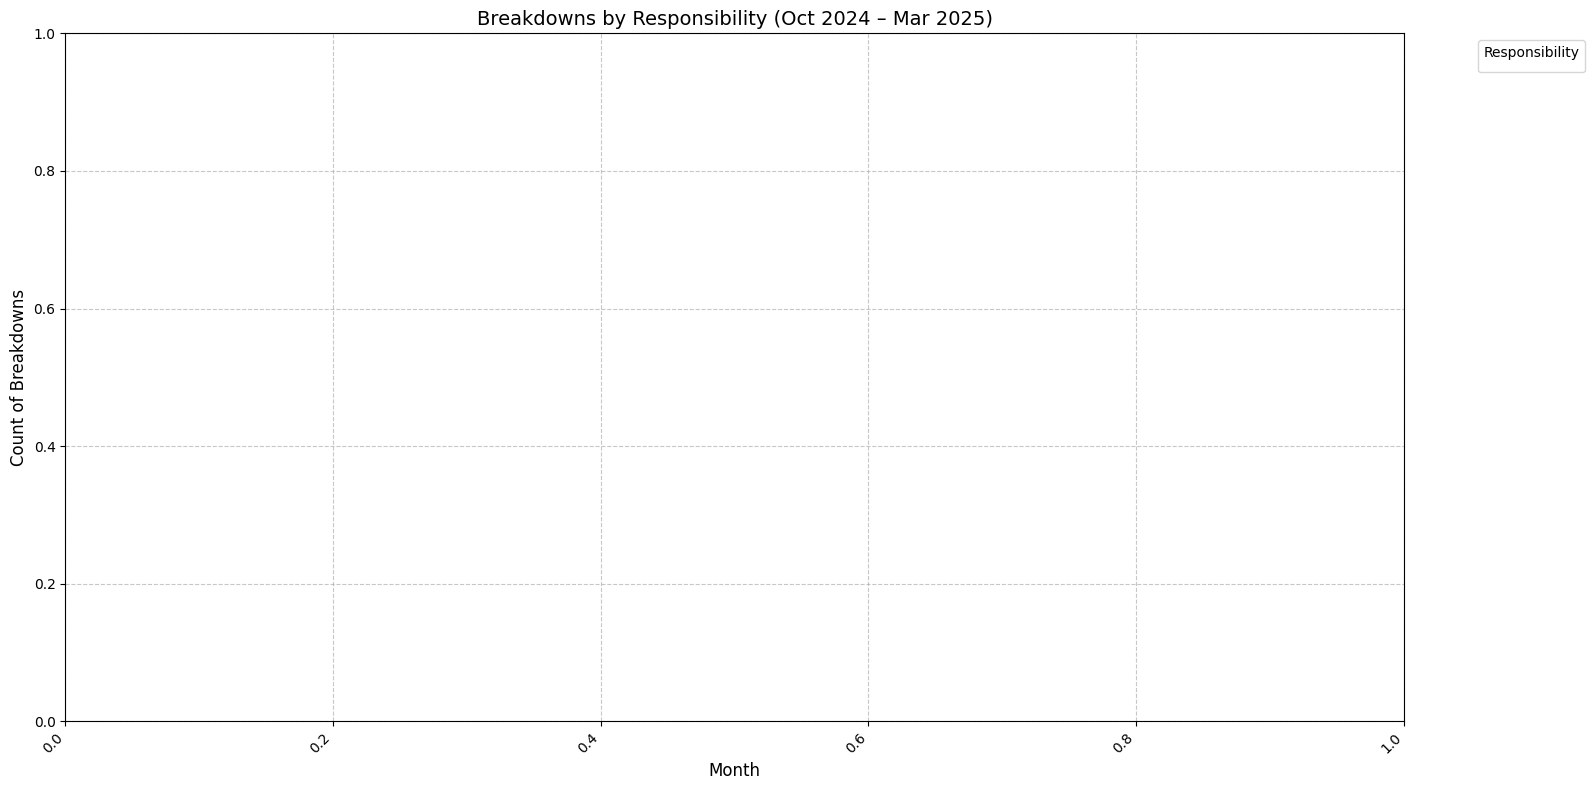

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'filtered_data' DataFrame is already available

# Ensure 'Incident Date' is in datetime format
filtered_data['Incident Date'] = pd.to_datetime(filtered_data['Incident Date'])

# Filter data for the last 6 months (Oct 2024 - Mar 2025)
start_date = '2024-10-01'
end_date = '2025-03-31'
filtered_data = filtered_data[(filtered_data['Incident Date'] >= start_date) & (filtered_data['Incident Date'] <= end_date)].copy()

# Create Month_Label from the 'Incident Date' column
filtered_data['Month_Label'] = filtered_data['Incident Date'].dt.strftime('%b-%Y')

# Order months: Oct 2024 to Mar 2025
month_order = ['Oct-2024', 'Nov-2024', 'Dec-2024', 'Jan-2025', 'Feb-2025', 'Mar-2025']
filtered_data['Month_Label'] = pd.Categorical(filtered_data['Month_Label'], categories=month_order, ordered=True)

# Group by Month_Label and Responsibility to count breakdowns (ID)
monthly_responsibility_breakdowns = filtered_data.groupby(['Month_Label', 'Responsiblity'])['ID'].count().reset_index()

# Plotting the bar graph
plt.figure(figsize=(16, 8))
sns.barplot(
    x='Month_Label',  # Use Month_Label for x-axis
    y='ID',  # Count of breakdowns (ID)
    hue='Responsiblity',  # Use 'Responsiblity' for hue
    data=monthly_responsibility_breakdowns,
    palette='viridis'  # Use a different color palette
)

# Set labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count of Breakdowns', fontsize=12)
plt.title('Breakdowns by Responsibility (Oct 2024 – Mar 2025)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Grid styling
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{int(height)}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center', fontsize=10, color='black',
                           xytext=(0, 5), textcoords='offset points')

# Display legend
plt.legend(title='Responsibility', bbox_to_anchor=(1.05, 1), loc='upper left')

# Layout adjustment for tight fit
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
responsibility_counts = data.groupby('Responsiblity')['ID'].count()
responsibility_counts


Responsiblity
3eco     458
3evi    3323
Name: ID, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3781 entries, 0 to 3780
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3781 non-null   object 
 1   vin                      3781 non-null   object 
 2   RTO Registration Number  3781 non-null   object 
 3   Vehicle model            3781 non-null   object 
 4   Vehicle Dispatch Date    2835 non-null   object 
 5   Vehicle status           3781 non-null   object 
 6   FOS                      3781 non-null   object 
 7   FON                      3781 non-null   object 
 8   Incident Date            3781 non-null   object 
 9   Incident Time            3781 non-null   float64
 10  Incident Description     3781 non-null   object 
 11  Injury                   3781 non-null   object 
 12  Injury Details           1598 non-null   object 
 13  Vehicle Loaded           3781 non-null   object 
 14  Damaged                 

<ipython-input-88-ba1afd90d6b9>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_responsibility_breakdowns = filtered_data.groupby(['Month_Label', 'Responsiblity'])['ID'].count().reset_index()


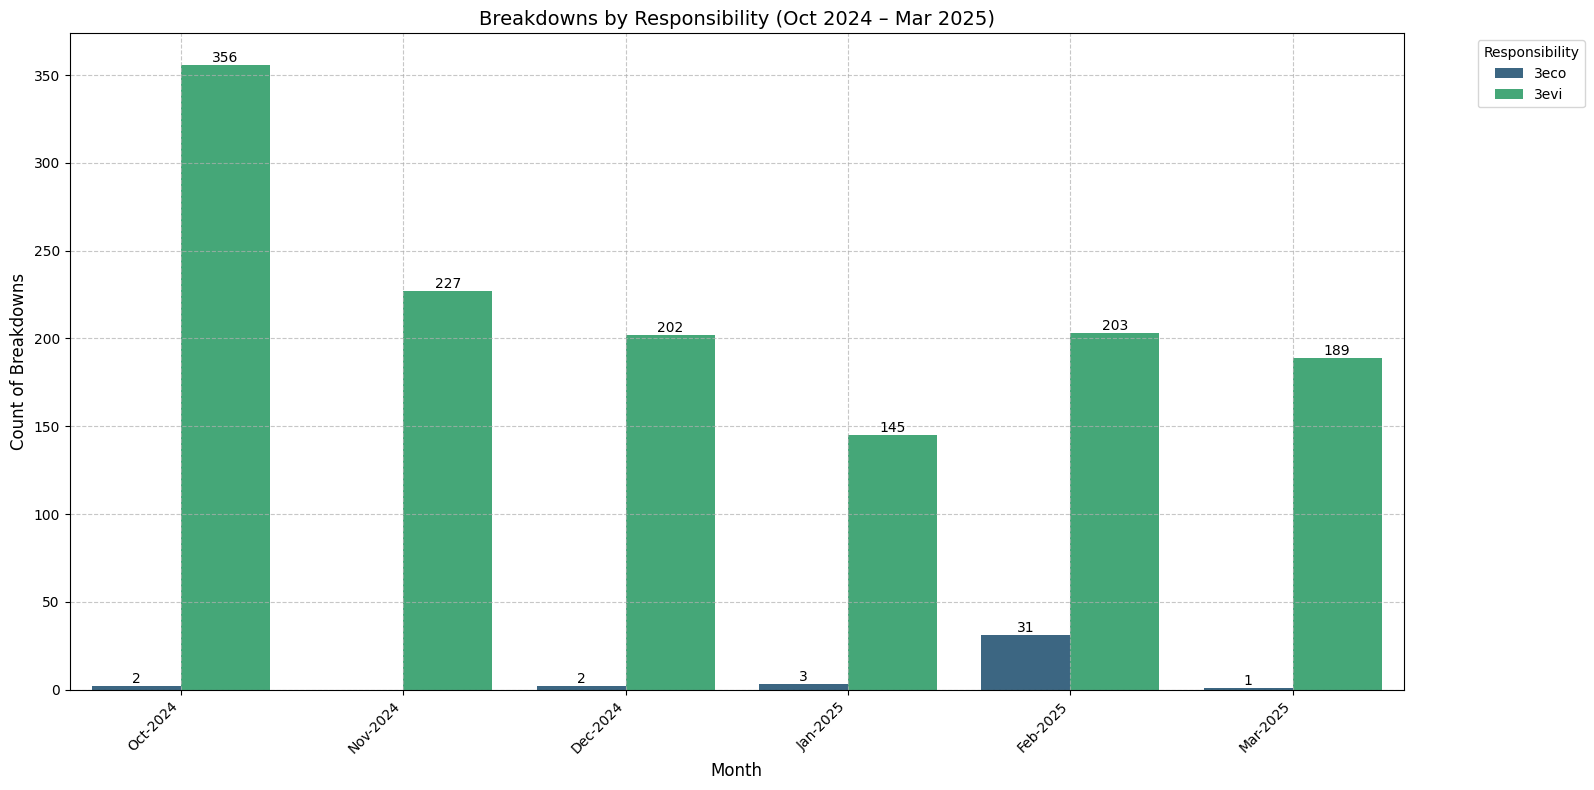

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'filtered_data' DataFrame is already available

# Ensure 'Incident Date' is in datetime format
filtered_data['Incident Date'] = pd.to_datetime(filtered_data['Incident Date'])

# Filter data for the last 6 months (Oct 2024 - Mar 2025)
start_date = '2024-10-01'
end_date = '2025-03-31'
filtered_data = filtered_data[(filtered_data['Incident Date'] >= start_date) & (filtered_data['Incident Date'] <= end_date)].copy()

# Create Month_Label from the 'Incident Date' column
filtered_data['Month_Label'] = filtered_data['Incident Date'].dt.strftime('%b-%Y')

# Order months: Oct 2024 to Mar 2025
month_order = ['Oct-2024', 'Nov-2024', 'Dec-2024', 'Jan-2025', 'Feb-2025', 'Mar-2025']
filtered_data['Month_Label'] = pd.Categorical(filtered_data['Month_Label'], categories=month_order, ordered=True)

# Group by Month_Label and Responsibility to count breakdowns (ID)
monthly_responsibility_breakdowns = filtered_data.groupby(['Month_Label', 'Responsiblity'])['ID'].count().reset_index()

# Plotting the bar graph
plt.figure(figsize=(16, 8))
sns.barplot(
    x='Month_Label',  # Use Month_Label for x-axis
    y='ID',  # Count of breakdowns (ID)
    hue='Responsiblity',  # Use 'Responsiblity' for hue
    data=monthly_responsibility_breakdowns,
    palette='viridis'  # Use a different color palette
)

# Set labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count of Breakdowns', fontsize=12)
plt.title('Breakdowns by Responsibility (Oct 2024 – Mar 2025)', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Grid styling
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{int(height)}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center', fontsize=10, color='black',
                           xytext=(0, 5), textcoords='offset points')

# Display legend
plt.legend(title='Responsibility', bbox_to_anchor=(1.05, 1), loc='upper left')

# Layout adjustment for tight fit
plt.tight_layout()

# Show the plot
plt.show()



# Last 7 days analysis


## Last 7 days breakdowns

In [25]:
#Table for breakdowns from 28 April  to 4 May

start_date = datetime(2025, 4, 28)
end_date = datetime(2025, 5, 4)
last_7_days_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

# 1. Table: with accident
fon_breakdown_all = last_7_days_data.groupby(['FON', 'Incident Type'])['ID'].count().unstack().fillna(0)
fon_breakdown_all['Total'] = fon_breakdown_all.sum(axis=1)
print("FON Wise Breakdowns (All Incident Types) from 28 April to 4 May 2025")
display(fon_breakdown_all)


# 2. Table: Without Accident
no_accident_data = last_7_days_data[last_7_days_data['Incident Type'] != 'Accident']
fon_breakdown_no_accident = no_accident_data.groupby(['FON', 'Incident Type'])['ID'].count().unstack().fillna(0)
fon_breakdown_no_accident['Total'] = fon_breakdown_no_accident.sum(axis=1)
print("FON Wise Breakdowns (Without Accidents)from 28 April to 4 May 2025")
display(fon_breakdown_no_accident)

# accidental  damanges to be made out of it .


FON Wise Breakdowns (All Incident Types) from 28 April to 4 May 2025


Incident Type  Accident  Electrical  Mechanical  Total
FON                                                   
BLR                 1.0         2.0        10.0   13.0
CHN                 2.0         0.0        14.0   16.0
COI                 1.0         3.0         2.0    6.0
HYD                 1.0         0.0         2.0    3.0
MMB                 4.0         0.0        22.0   26.0

FON Wise Breakdowns (Without Accidents)from 28 April to 4 May 2025


Incident Type  Electrical  Mechanical  Total
FON                                         
BLR                   2.0        10.0   12.0
CHN                   0.0        14.0   14.0
COI                   3.0         2.0    5.0
HYD                   0.0         2.0    2.0
MMB                   0.0        22.0   22.0

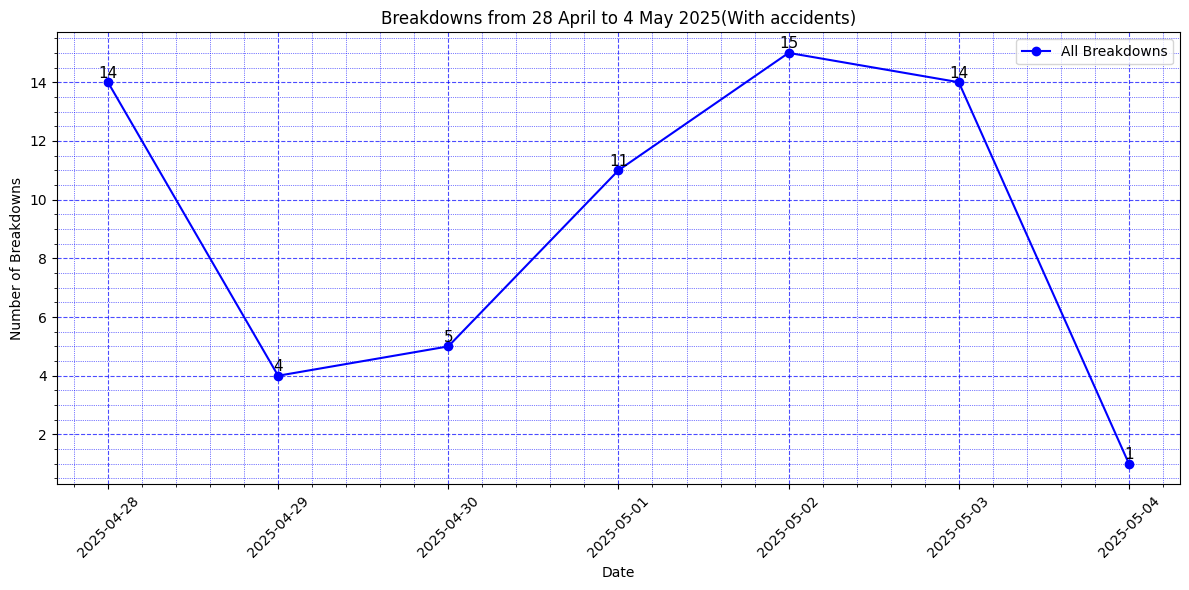

In [26]:
#Table for breakdowns from 28 April  to 4 May

start_date = datetime(2025, 4, 28)
end_date = datetime(2025, 5, 4)
period_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

# Graph 1: All Breakdown Types for the period
daily_breakdowns_all = period_data.groupby('Incident Date')['ID'].count()

# Reindex to include all dates in the range, filling missing dates with zero
all_dates = pd.date_range(start=start_date, end=end_date)
daily_breakdowns_all = daily_breakdowns_all.reindex(all_dates, fill_value=0)

plt.figure(figsize=(12, 6))
plt.plot(daily_breakdowns_all.index, daily_breakdowns_all.values, marker='o', linestyle='-', color='blue', label='All Breakdowns')

# Add data labels to the points
for x, y in zip(daily_breakdowns_all.index, daily_breakdowns_all.values):
    plt.text(x, y+0.05, str(y), ha='center', va='bottom', fontsize=11)
# Customization
plt.xlabel('Date')
plt.ylabel('Number of Breakdowns')
plt.title('Breakdowns from 28 April to 4 May 2025(With accidents)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
# Major gridlines (dashed blue)
plt.grid(True, linestyle='--', alpha=0.7, color='blue')

# Minor gridlines (finer, lighter blue)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='blue')
plt.show()



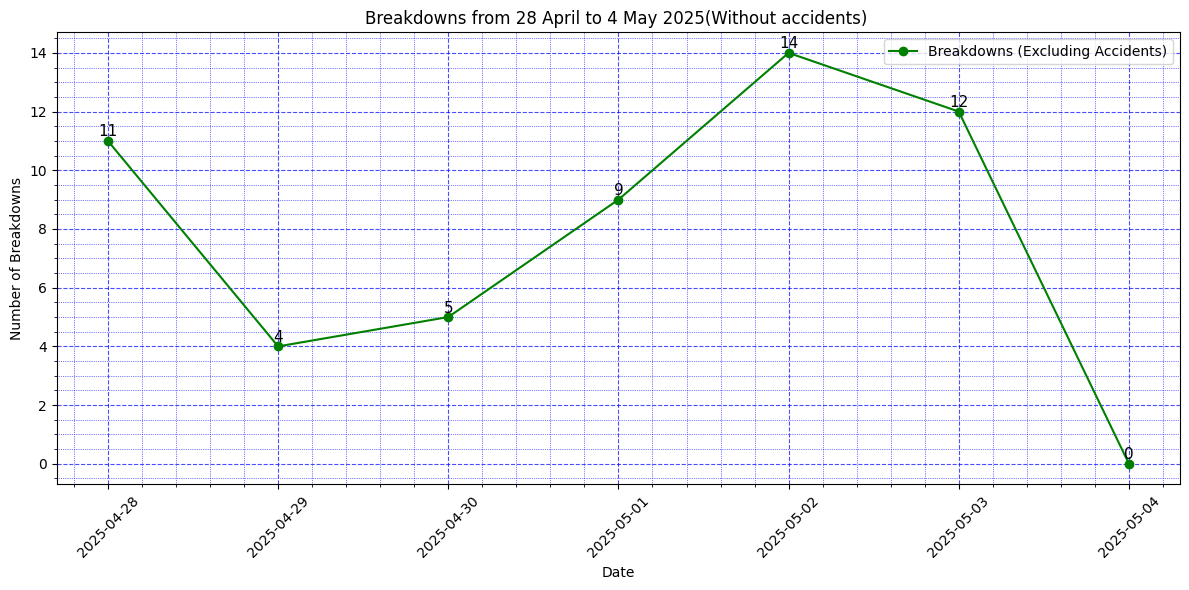

In [27]:
# Graph 2: Breakdowns excluding accidents for the period
no_accidents_data = period_data[period_data['Incident Type'] != 'Accident']
daily_breakdowns_no_accidents = no_accidents_data.groupby('Incident Date')['ID'].count()

# Reindex to include all dates in the range, filling missing dates with zero
all_dates = pd.date_range(start=start_date, end=end_date)
daily_breakdowns_no_accidents = daily_breakdowns_no_accidents.reindex(all_dates, fill_value=0)


plt.figure(figsize=(12, 6))

plt.plot(daily_breakdowns_no_accidents.index, daily_breakdowns_no_accidents.values, marker='o', linestyle='-', color='green', label='Breakdowns (Excluding Accidents)')

# Add data labels to the points
for x, y in zip(daily_breakdowns_no_accidents.index, daily_breakdowns_no_accidents.values):
    plt.text(x, y+0.05, str(y), ha='center', va='bottom', fontsize=11)

# Customization
plt.xlabel('Date')
plt.ylabel('Number of Breakdowns')
plt.title('Breakdowns from 28 April to 4 May 2025(Without accidents) ')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
# Major gridlines (dashed blue)
plt.grid(True, linestyle='--', alpha=0.7, color='blue')

# Minor gridlines (finer, lighter blue)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='blue')
plt.show()

### last 7 days breakdowns FON wise


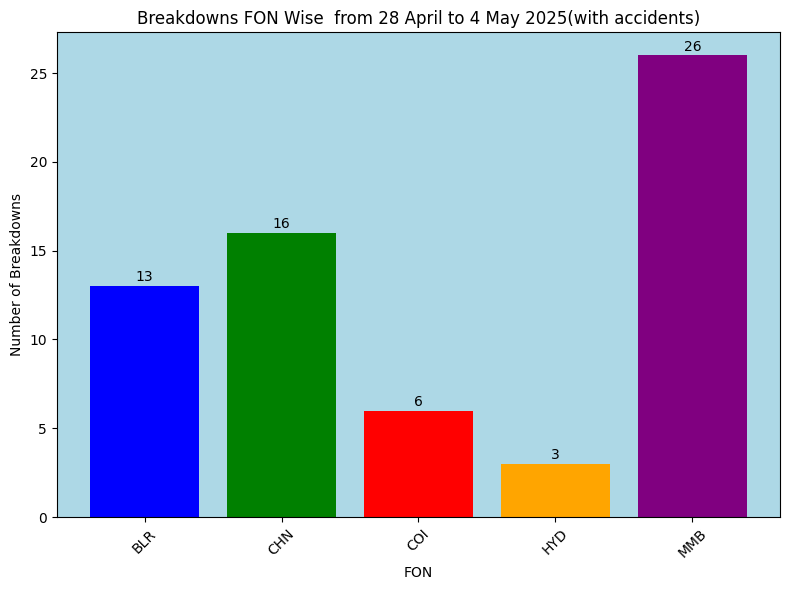

In [28]:
# last 7 days breakdowns FON wise

# Group by FON and count breakdowns
fon_breakdowns = last_7_days_data.groupby('FON')['ID'].count()

# Create a bar chart with different colors for each bar
plt.figure(figsize=(8, 6))
bars = plt.bar(fon_breakdowns.index, fon_breakdowns.values, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.xlabel('FON')
plt.ylabel('Number of Breakdowns')
plt.title('Breakdowns FON Wise  from 28 April to 4 May 2025(with accidents)')


# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')
# Set the light blue background
plt.gca().set_facecolor('lightblue')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


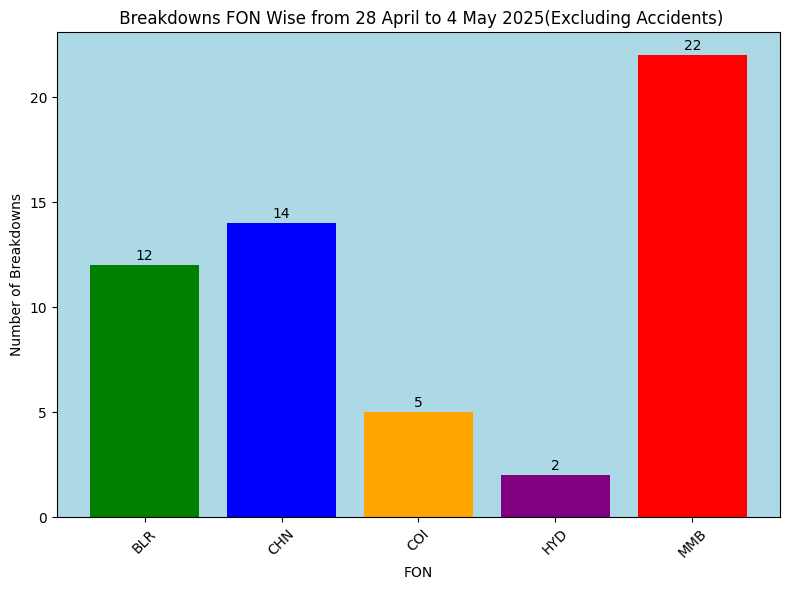

In [29]:
#  without accidents

import matplotlib.pyplot as plt
# Filter out rows with 'Incident Type' as 'Accident'
no_accidents_data_last_7_days = last_7_days_data[last_7_days_data['Incident Type'] != 'Accident']

# Group by FON and count breakdowns (excluding accidents)
fon_breakdowns_no_accidents = no_accidents_data_last_7_days.groupby('FON')['ID'].count()

# Create a bar chart with different colors for each bar
plt.figure(figsize=(8, 6))
bars = plt.bar(fon_breakdowns_no_accidents.index, fon_breakdowns_no_accidents.values, color=['green','blue', 'orange','purple', 'red'])
plt.xlabel('FON')
plt.ylabel('Number of Breakdowns')
plt.title(' Breakdowns FON Wise from 28 April to 4 May 2025(Excluding Accidents)')


# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')
# Set the light blue background
plt.gca().set_facecolor('lightblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## last 7 days breakdowns by type

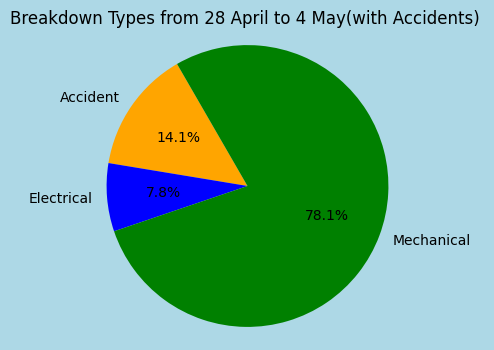

Incident Type Counts:
Incident Type
Accident       9
Electrical     5
Mechanical    50
Name: ID, dtype: int64


In [30]:
#Table for breakdowns from 28 April  to 4 May

start_date = datetime(2025, 4, 28)
end_date = datetime(2025, 5, 4)
period_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

# Group by Incident Type and count the number of breakdowns
incident_type_counts = period_data.groupby('Incident Type')['ID'].count()

# Create a pie chart
plt.figure(figsize=(4, 4))
colors = ['orange', 'blue','green']  # Define colors for each slice
plt.pie(incident_type_counts, labels=incident_type_counts.index, autopct='%1.1f%%', startangle=120, colors=colors)
plt.title('Breakdown Types from 28 April to 4 May(with Accidents) ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.gcf().set_facecolor('lightblue')

# Add a border around the plot
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Border color
    spine.set_linewidth(2)        # Border thickness

plt.show()


# Print the counts for each incident type
print("Incident Type Counts:")
print(incident_type_counts)


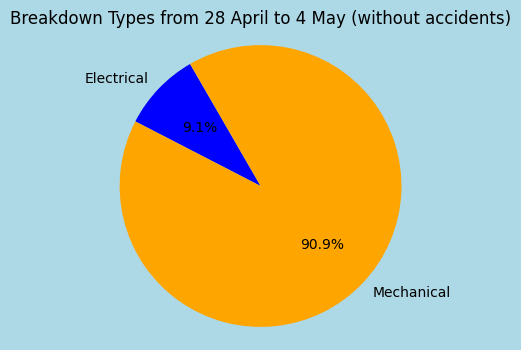

Incident Type Counts:
Incident Type
Electrical     5
Mechanical    50
Name: ID, dtype: int64


In [31]:
#Table for breakdowns from 28 April  to 4 May

start_date = datetime(2025, 4, 28)
end_date = datetime(2025, 5, 4)
period_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

# Filter out rows with 'Incident Type' as 'Accident'
no_accidents_data = period_data[period_data['Incident Type'] != 'Accident']

# Group by Incident Type and count the number of breakdowns
incident_type_counts_no_accidents = no_accidents_data.groupby('Incident Type')['ID'].count()

# Create a pie chart
plt.figure(figsize=(4, 4))
colors = ['blue', 'orange', 'blue']  # Define colors for each slice
plt.pie(incident_type_counts_no_accidents, labels=incident_type_counts_no_accidents.index, autopct='%1.1f%%', startangle=120, colors=colors)
plt.title('Breakdown Types from 28 April to 4 May (without accidents)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.gcf().set_facecolor('lightblue')

# Add a border around the plot
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Border color
    spine.set_linewidth(2)        # Border thickness

plt.show()

# Print the counts for each incident type
print("Incident Type Counts:")
print(incident_type_counts_no_accidents)


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3910 entries, 0 to 3915
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       3910 non-null   object        
 1   vin                      3910 non-null   object        
 2   RTO Registration Number  3910 non-null   object        
 3   FOS                      3910 non-null   object        
 4   FON                      3910 non-null   object        
 5   Incident Date            3910 non-null   datetime64[ns]
 6   Incident Time            3910 non-null   float64       
 7   Incident Description     3910 non-null   object        
 8   Injury                   3910 non-null   object        
 9   Injury Details           1688 non-null   object        
 10  Vehicle Loaded           3910 non-null   object        
 11  Damaged                  3910 non-null   object        
 12  Damage Details           2146 non-null 

Last 7 days Root causes

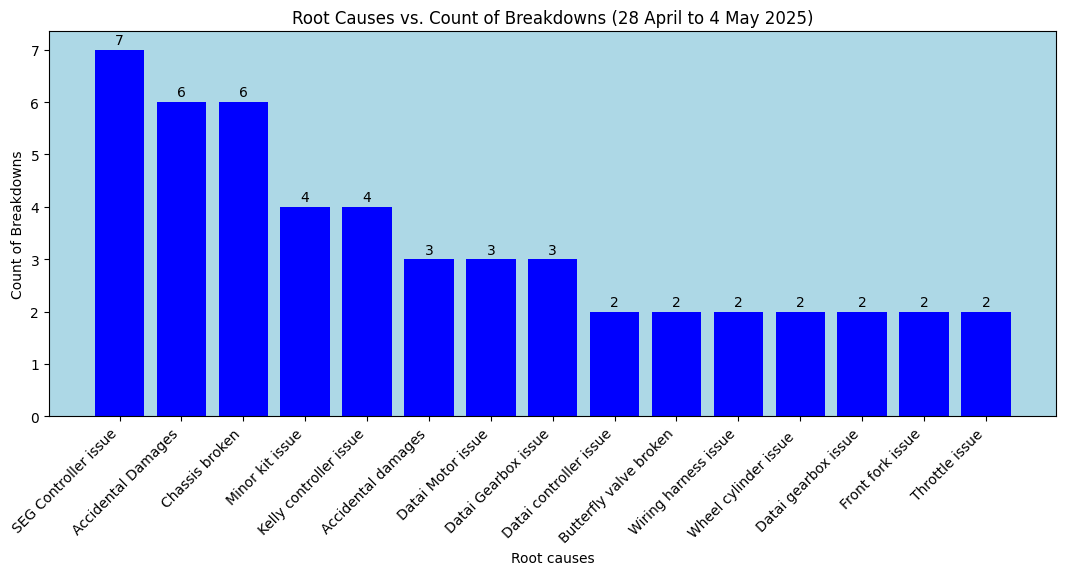

In [34]:

# Group by 'Root Cause' and count breakdowns
root_cause_counts = period_data.groupby('Root Cause')['ID'].count().sort_values(ascending=False).head(15)

# Create a bar chart
plt.figure(figsize=(13, 5))
bars = plt.bar(root_cause_counts.index, root_cause_counts.values, color='Blue')
plt.xlabel('Root causes')
plt.ylabel('Count of Breakdowns')
plt.title('Root Causes vs. Count of Breakdowns (28 April to 4 May 2025)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

plt.gca().set_facecolor('lightblue')


plt.show()



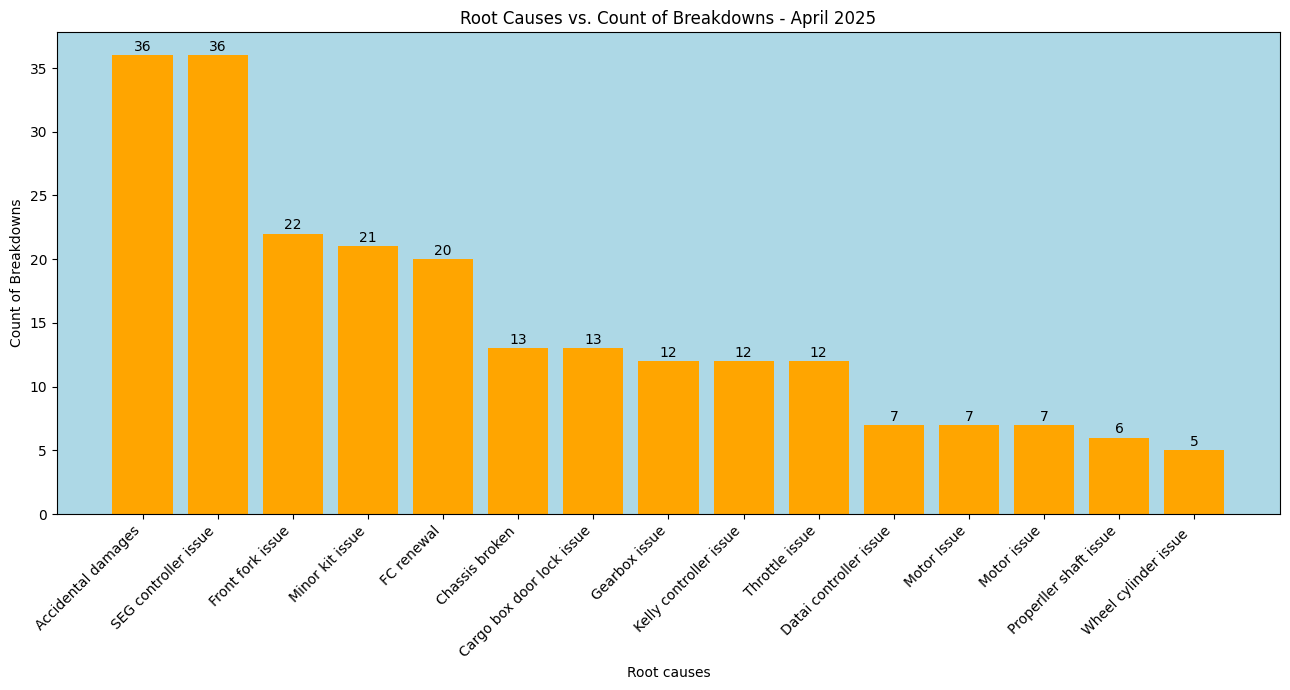

In [41]:
#Table for breakdowns from 1 to 30 April

start_date = datetime(2025, 4, 1)
end_date = datetime(2025, 4, 30)
MTD_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

import matplotlib.pyplot as plt
# Assuming 'period_data' DataFrame from the previous code is available

# Group by 'Root Cause' and count breakdowns
root_cause_counts = MTD_data.groupby('Root Cause')['ID'].count().sort_values(ascending=False).head(15)

# Create a bar chart
plt.figure(figsize=(13,7))
bars = plt.bar(root_cause_counts.index, root_cause_counts.values, color='Orange')
plt.xlabel('Root causes')
plt.ylabel('Count of Breakdowns')
plt.title('Root Causes vs. Count of Breakdowns - April 2025')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')

plt.gca().set_facecolor('LightBlue')

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


## Last 7 days - breakdowns-  Responsiblity

<ipython-input-43-eef489a02bc1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['Responsiblity'] = period_data['Responsiblity'].replace([np.nan, ''], 'TBD')
<ipython-input-43-eef489a02bc1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['Responsiblity'] = period_data['Responsiblity'].str.strip().replace('', 'TBD')


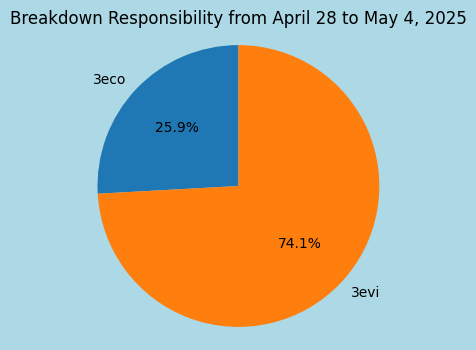

In [43]:

period_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

# Replace both NaN and blank/whitespace-only values in the 'Responsiblity' column with 'TBD'
period_data['Responsiblity'] = period_data['Responsiblity'].replace([np.nan, ''], 'TBD')
period_data['Responsiblity'] = period_data['Responsiblity'].str.strip().replace('', 'TBD')

# Group by 'Responsiblity' and count occurrences
responsibility_counts = period_data.groupby('Responsiblity')['ID'].count()

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(responsibility_counts, labels=responsibility_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Breakdown Responsibility from April 28 to May 4, 2025' )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.gcf().set_facecolor('lightblue')
plt.show()


##VIN numbers and breakdown percentage calculation of repeated breakdowns.

<ipython-input-48-5e704a11bf44>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_monthly_data['Repeated_VINS'].fillna(0, inplace=True)


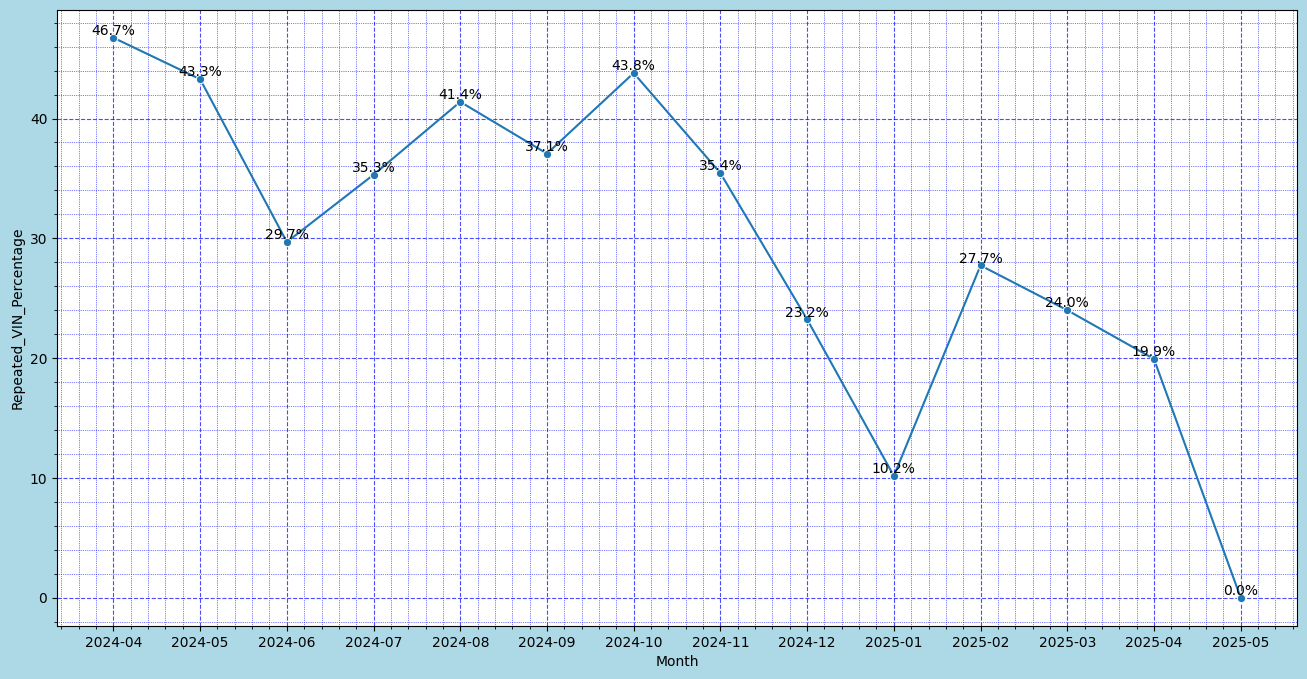

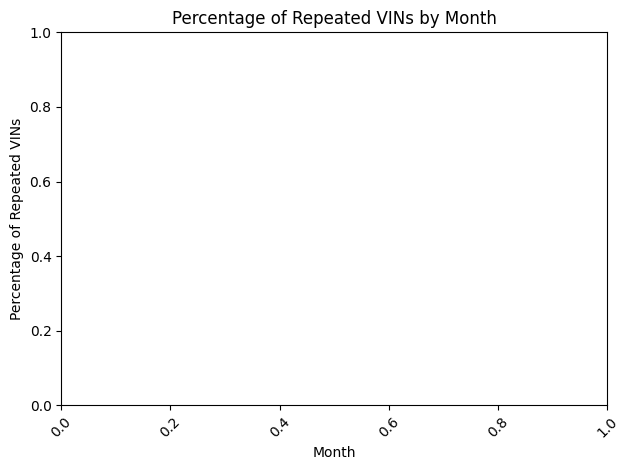

<ipython-input-48-5e704a11bf44>:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_fon_data['Repeated_VINS'].fillna(0, inplace=True)


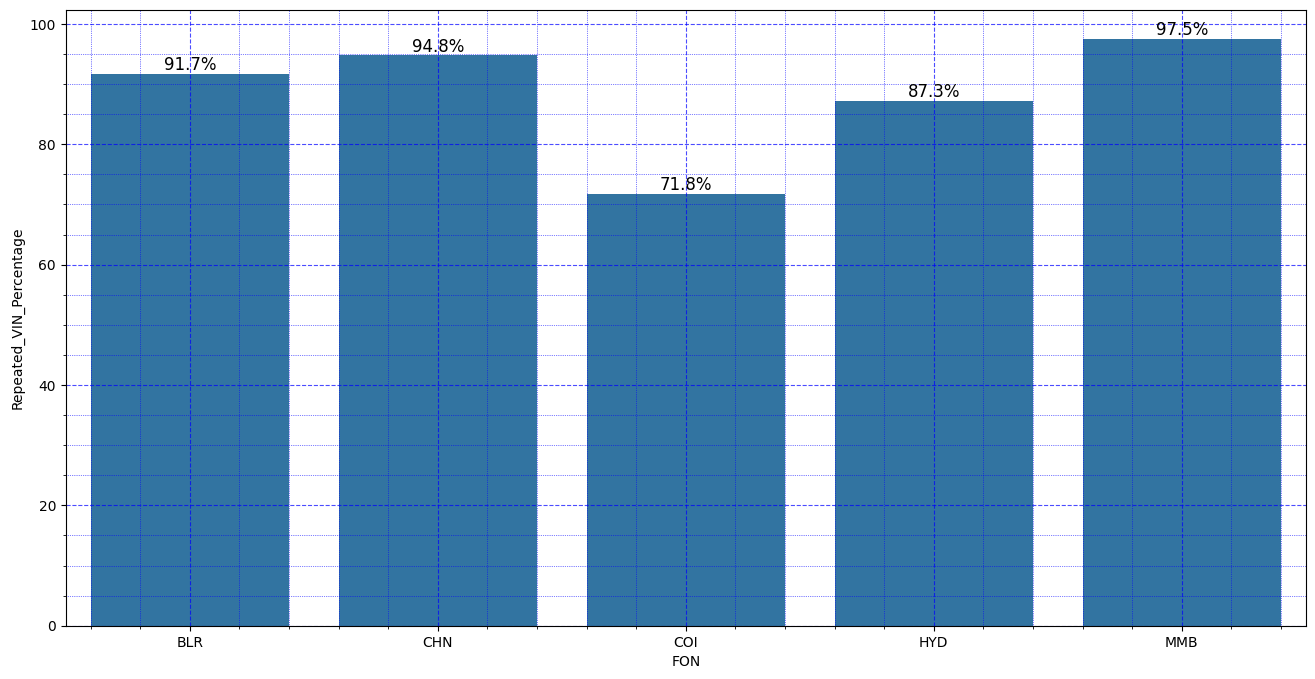

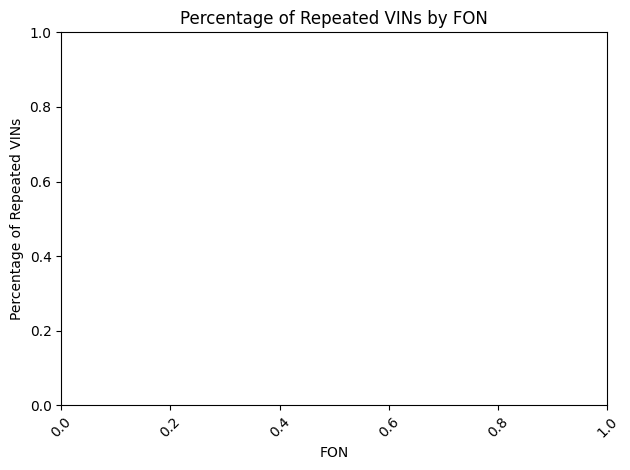

In [48]:
# Ensure 'Incident Date' is in datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Calculate the percentage of repeated VINs by month
data['Month'] = data['Incident Date'].dt.to_period('M')

monthly_vin_counts = data.groupby(['Month', 'vin'])['vin'].count().reset_index(name='VIN_Count')
monthly_total_vins = monthly_vin_counts.groupby('Month')['VIN_Count'].sum().reset_index(name='Total_VINS')

# Identify repeated VINs (those appearing more than once)
monthly_repeated_vins = (
    monthly_vin_counts[monthly_vin_counts['VIN_Count'] > 1]
    .groupby('Month')['VIN_Count']
    .sum()
    .reset_index(name='Repeated_VINS')
)

# Merge and handle missing values
merged_monthly_data = pd.merge(monthly_total_vins, monthly_repeated_vins, on='Month', how='left')
merged_monthly_data['Repeated_VINS'].fillna(0, inplace=True)
merged_monthly_data['Repeated_VIN_Percentage'] = (merged_monthly_data['Repeated_VINS'] / merged_monthly_data['Total_VINS']) * 100

# Plotting repeated VIN percentage by month with data labels
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x=merged_monthly_data['Month'].astype(str), y='Repeated_VIN_Percentage', data=merged_monthly_data, marker='o')



# Adding labels to each data point
for i, row in merged_monthly_data.iterrows():
    plt.text(row['Month'].strftime('%Y-%m'), row['Repeated_VIN_Percentage'], f"{row['Repeated_VIN_Percentage']:.1f}%",
             ha='center', va='bottom', fontsize=10)
# Major gridlines (dashed blue)
plt.grid(True, linestyle='--', alpha=0.7, color='blue')

# Minor gridlines (finer, lighter blue)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='blue')
plt.gcf().set_facecolor('lightblue')
plt.show()


plt.xlabel('Month')
plt.ylabel('Percentage of Repeated VINs')
plt.title('Percentage of Repeated VINs by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the percentage of repeated VINs by FON
fon_vin_counts = data.groupby(['FON', 'vin'])['vin'].count().reset_index(name='VIN_Count')
fon_total_vins = fon_vin_counts.groupby('FON')['VIN_Count'].sum().reset_index(name='Total_VINS')

fon_repeated_vins = (
    fon_vin_counts[fon_vin_counts['VIN_Count'] > 1]
    .groupby('FON')['VIN_Count']
    .sum()
    .reset_index(name='Repeated_VINS')
)

# Merge and handle missing values
merged_fon_data = pd.merge(fon_total_vins, fon_repeated_vins, on='FON', how='left')
merged_fon_data['Repeated_VINS'].fillna(0, inplace=True)
merged_fon_data['Repeated_VIN_Percentage'] = (merged_fon_data['Repeated_VINS'] / merged_fon_data['Total_VINS']) * 100

# Plotting repeated VIN percentage by FON with data labels
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='FON', y='Repeated_VIN_Percentage', data=merged_fon_data)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)


# Major gridlines (dashed blue)
plt.grid(True, linestyle='--', alpha=0.7, color='blue')

# Minor gridlines (finer, lighter blue)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='blue')
plt.show()

plt.xlabel('FON')
plt.ylabel('Percentage of Repeated VINs')
plt.title('Percentage of Repeated VINs by FON')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
!pip install adjustText

In [50]:
from adjustText import adjust_text


<ipython-input-51-f9d7e5d3aadb>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_monthly_data['Repeated_VINS'].fillna(0, inplace=True)


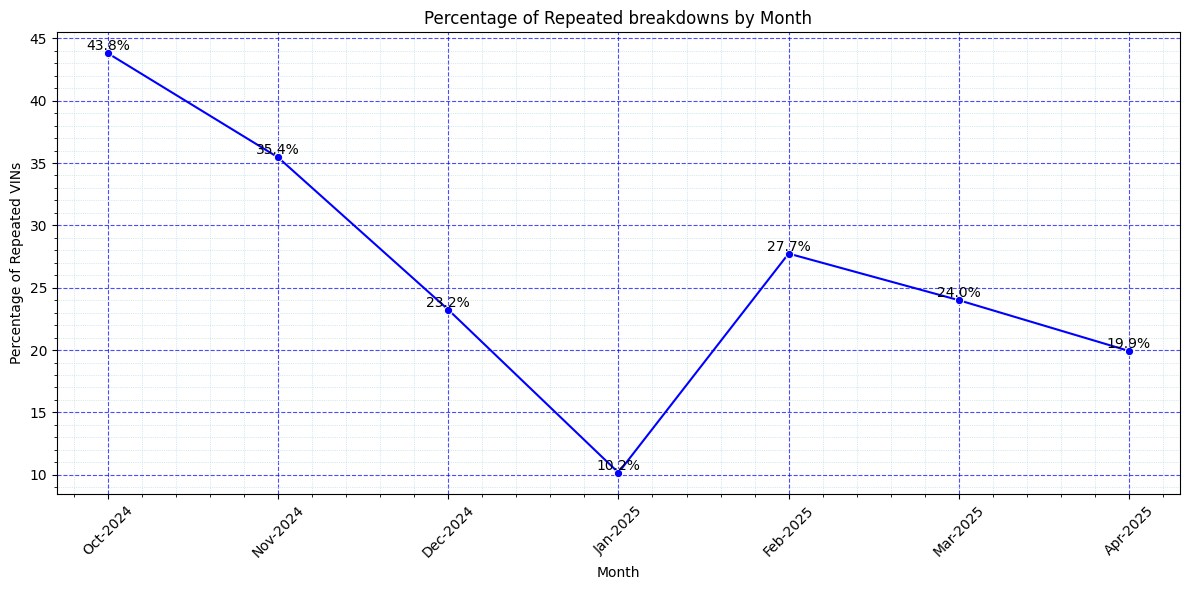

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Incident Date' is in datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Filter data from Oct 2024 to Apr 2025
start_date = '2024-10-01'
end_date = '2025-04-30'
data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)].copy()

# Create a Month column (period)
data['Month'] = data['Incident Date'].dt.to_period('M')

# Count VINs per month
monthly_vin_counts = data.groupby(['Month', 'vin'])['vin'].count().reset_index(name='VIN_Count')
monthly_total_vins = monthly_vin_counts.groupby('Month')['VIN_Count'].sum().reset_index(name='Total_VINS')

# Identify repeated VINs (count > 1)
monthly_repeated_vins = (
    monthly_vin_counts[monthly_vin_counts['VIN_Count'] > 1]
    .groupby('Month')['VIN_Count']
    .sum()
    .reset_index(name='Repeated_VINS')
)

# Merge total and repeated VINs
merged_monthly_data = pd.merge(monthly_total_vins, monthly_repeated_vins, on='Month', how='left')
merged_monthly_data['Repeated_VINS'].fillna(0, inplace=True)
merged_monthly_data['Repeated_VIN_Percentage'] = (merged_monthly_data['Repeated_VINS'] / merged_monthly_data['Total_VINS']) * 100

# Convert Period to string for plotting
merged_monthly_data['Month_Str'] = merged_monthly_data['Month'].dt.strftime('%b-%Y')

# Define correct order of months
month_order = ['Oct-2024', 'Nov-2024', 'Dec-2024', 'Jan-2025', 'Feb-2025', 'Mar-2025', 'Apr-2025']
merged_monthly_data['Month_Str'] = pd.Categorical(merged_monthly_data['Month_Str'], categories=month_order, ordered=True)

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    x='Month_Str',
    y='Repeated_VIN_Percentage',
    data=merged_monthly_data,
    marker='o',
    color='blue'
)

# Add data labels
for i, row in merged_monthly_data.iterrows():
    plt.text(row['Month_Str'], row['Repeated_VIN_Percentage'], f"{row['Repeated_VIN_Percentage']:.1f}%",
             ha='center', va='bottom', fontsize=10)

# Styling
plt.xlabel('Month')
plt.ylabel('Percentage of Repeated VINs')
plt.title('Percentage of Repeated breakdowns by Month')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7, color='blue')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='lightblue')
plt.tight_layout()
plt.show()


<ipython-input-52-6b45f5c6e1b7>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_fon_data['Repeated_VINS'].fillna(0, inplace=True)


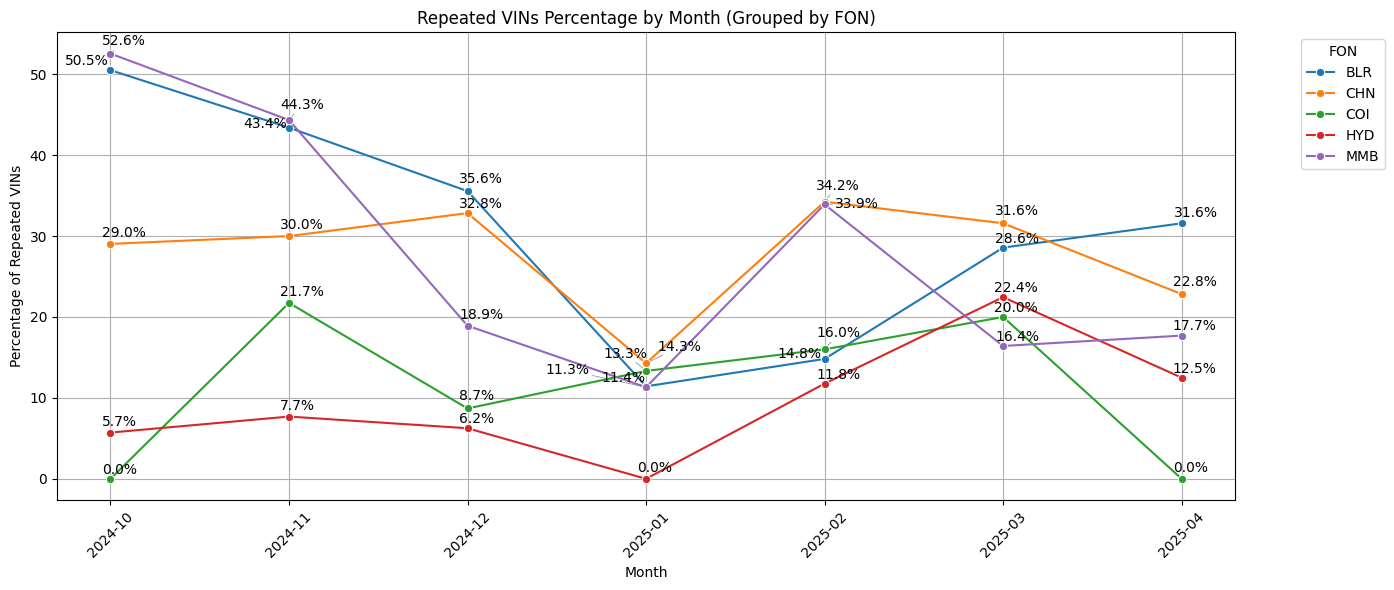

In [52]:

# Ensure 'Incident Date' is in datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Extract month for grouping
data['Month'] = data['Incident Date'].dt.to_period('M')

# Group by Month, FON, and VIN to count occurrences
fon_vin_counts = data.groupby(['Month', 'FON', 'vin'])['vin'].count().reset_index(name='VIN_Count')

# Calculate total VINs per FON per Month
fon_total_vins = fon_vin_counts.groupby(['Month', 'FON'])['VIN_Count'].sum().reset_index(name='Total_VINS')

# Identify repeated VINs per FON per Month
fon_repeated_vins = (
    fon_vin_counts[fon_vin_counts['VIN_Count'] > 1]
    .groupby(['Month', 'FON'])['VIN_Count']
    .sum()
    .reset_index(name='Repeated_VINS')
)

# Merge the datasets
merged_fon_data = pd.merge(fon_total_vins, fon_repeated_vins, on=['Month', 'FON'], how='left')
merged_fon_data['Repeated_VINS'].fillna(0, inplace=True)
merged_fon_data['Repeated_VIN_Percentage'] = (merged_fon_data['Repeated_VINS'] / merged_fon_data['Total_VINS']) * 100

# Convert Month to string format for better visualization
merged_fon_data['Month'] = merged_fon_data['Month'].astype(str)

# Plot: Line Graph of Repeated VINs Percentage by Month for each FON
plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=merged_fon_data, x='Month', y='Repeated_VIN_Percentage', hue='FON', marker='o')

# Adding labels to each data point using adjustText
texts = []
for i, row in merged_fon_data.iterrows():
    texts.append(plt.text(row['Month'], row['Repeated_VIN_Percentage'], f"{row['Repeated_VIN_Percentage']:.1f}%",
                          ha='center', va='bottom', fontsize=10))

# Adjust text positions to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

plt.xlabel('Month')
plt.ylabel('Percentage of Repeated VINs')
plt.title('Repeated VINs Percentage by Month (Grouped by FON)')
plt.xticks(rotation=45)
plt.legend(title="FON", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()




<ipython-input-53-8984175b4d58>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_incident_type_data['Repeated_VINS'].fillna(0, inplace=True)


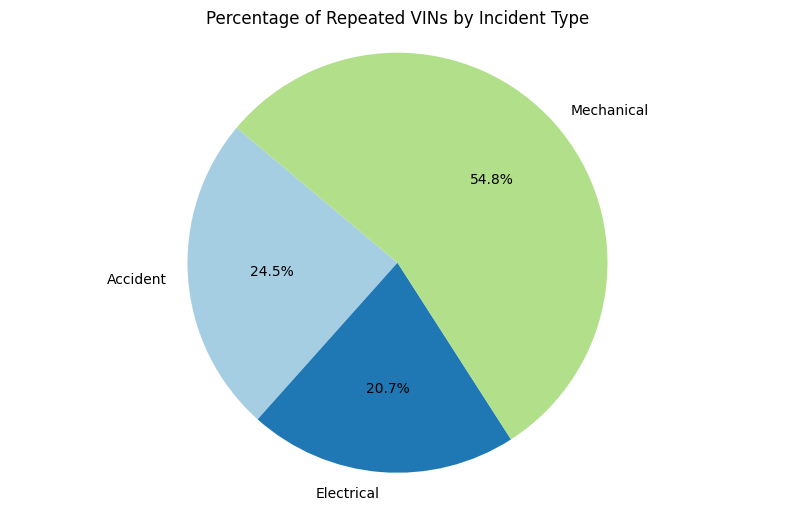

<ipython-input-53-8984175b4d58>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_status_data['Repeated_VINS'].fillna(0, inplace=True)


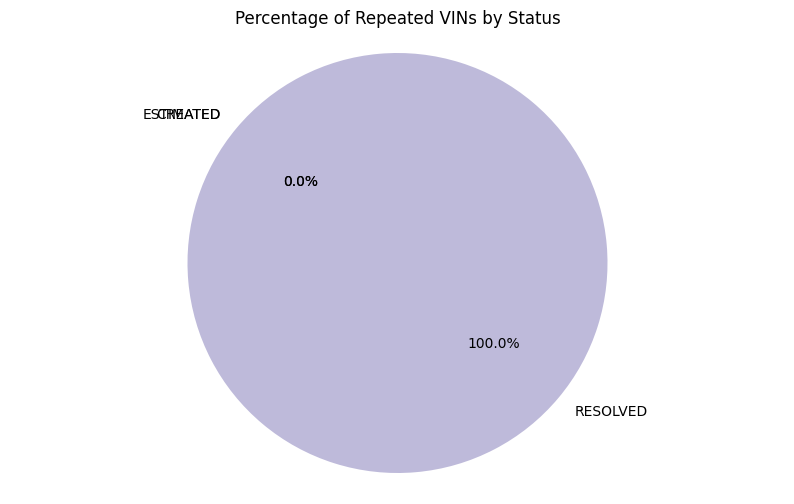

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Incident Type
incident_type_vin_counts = data.groupby(['Incident Type', 'vin'])['vin'].count().reset_index(name='VIN_Count')
incident_type_total_vins = incident_type_vin_counts.groupby('Incident Type')['VIN_Count'].sum().reset_index(name='Total_VINS')

incident_type_repeated_vins = (
    incident_type_vin_counts[incident_type_vin_counts['VIN_Count'] > 1]
    .groupby('Incident Type')['VIN_Count']
    .sum()
    .reset_index(name='Repeated_VINS')
)

merged_incident_type_data = pd.merge(incident_type_total_vins, incident_type_repeated_vins, on='Incident Type', how='left')
merged_incident_type_data['Repeated_VINS'].fillna(0, inplace=True)
merged_incident_type_data['Repeated_VIN_Percentage'] = (merged_incident_type_data['Repeated_VINS'] / merged_incident_type_data['Total_VINS']) * 100

# Plot pie chart for Incident Type
plt.figure(figsize=(10, 6))
plt.pie(
    merged_incident_type_data['Repeated_VIN_Percentage'],
    labels=merged_incident_type_data['Incident Type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Percentage of Repeated VINs by Incident Type')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()


# Group by Status
status_vin_counts = data.groupby(['Status', 'vin'])['vin'].count().reset_index(name='VIN_Count')
status_total_vins = status_vin_counts.groupby('Status')['VIN_Count'].sum().reset_index(name='Total_VINS')

status_repeated_vins = (
    status_vin_counts[status_vin_counts['VIN_Count'] > 1]
    .groupby('Status')['VIN_Count']
    .sum()
    .reset_index(name='Repeated_VINS')
)

merged_status_data = pd.merge(status_total_vins, status_repeated_vins, on='Status', how='left')
merged_status_data['Repeated_VINS'].fillna(0, inplace=True)
merged_status_data['Repeated_VIN_Percentage'] = (merged_status_data['Repeated_VINS'] / merged_status_data['Total_VINS']) * 100

# Plot pie chart for Status
plt.figure(figsize=(10, 6))
plt.pie(
    merged_status_data['Repeated_VIN_Percentage'],
    labels=merged_status_data['Status'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Percentage of Repeated VINs by Status')
plt.axis('equal')
plt.show()



In [ ]:
!pip install adjustText

<ipython-input-54-6c666b8e1bb5>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_incident_type_data['Repeated_VINS'].fillna(0, inplace=True)


5 [-0.3281714   0.34094017]
12 [-0.47660394 -0.3175462 ]


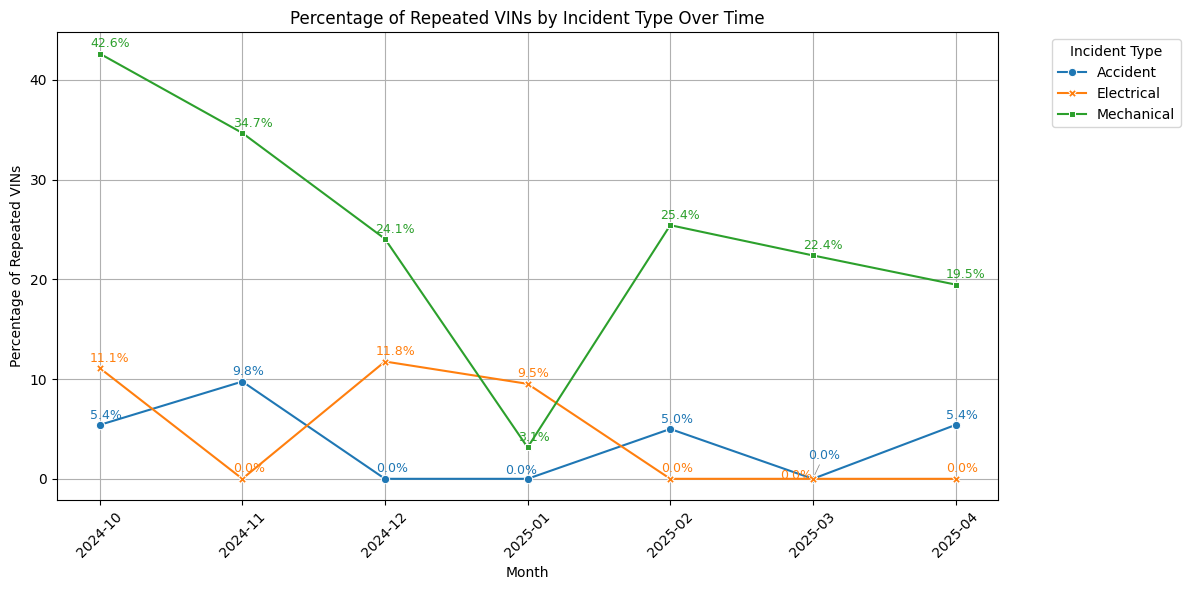

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text  # Import adjustText for better label positioning

# Ensure 'Incident Date' is in datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])
data['Month'] = data['Incident Date'].dt.to_period('M').astype(str)  # Convert Period to String

# Calculate repeated VINs per Incident Type and Month
incident_type_vin_counts = data.groupby(['Month', 'Incident Type', 'vin'])['vin'].count().reset_index(name='VIN_Count')
incident_type_total_vins = incident_type_vin_counts.groupby(['Month', 'Incident Type'])['VIN_Count'].sum().reset_index(name='Total_VINS')

incident_type_repeated_vins = (
    incident_type_vin_counts[incident_type_vin_counts['VIN_Count'] > 1]
    .groupby(['Month', 'Incident Type'])['VIN_Count']
    .sum()
    .reset_index(name='Repeated_VINS')
)

# Merge and handle missing values
merged_incident_type_data = pd.merge(incident_type_total_vins, incident_type_repeated_vins, on=['Month', 'Incident Type'], how='left')
merged_incident_type_data['Repeated_VINS'].fillna(0, inplace=True)
merged_incident_type_data['Repeated_VIN_Percentage'] = (merged_incident_type_data['Repeated_VINS'] / merged_incident_type_data['Total_VINS']) * 100

# Pivot to get Incident Types as separate series
pivot_df = merged_incident_type_data.pivot(index='Month', columns='Incident Type', values='Repeated_VIN_Percentage')

# Plot line graph with multiple series
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=pivot_df, markers=True, dashes=False)

# Adding Data Labels
texts = []  # Store text labels for adjustment
for line, incident_type in zip(ax.lines, pivot_df.columns):
    for x, y in zip(pivot_df.index, line.get_ydata()):
        if not pd.isna(y):  # Skip NaN values
            text = ax.text(x, y, f"{y:.1f}%", ha='center', va='bottom', fontsize=9, color=line.get_color())
            texts.append(text)

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Formatting the graph
plt.xlabel('Month')
plt.ylabel('Percentage of Repeated VINs')
plt.title('Percentage of Repeated VINs by Incident Type Over Time')
plt.xticks(rotation=45)
plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()




In [64]:
data.head(15)

ID                vin RTO Registration Number           FOS  \
41  IR2025043013  MD9B30CWWND558440              KA53AA7446  Banashankari   
42  IR2025043011  MD9B55CWWPE558966              KA53AB2297         Vasai   
43   IR202504309  MD9B55CWWPD558799              MH04KX7338        Kalyan   
44   IR202504307  MD9B55CWWPC558724              KA53AB0025    Madhavaram   
45   IR202504305  MD9B30CWWMJ558178              KA53AA4867     Alapakkam   
46   IR202504298  MD9B30CWWMA558006              KA53AA3732   Soukya Road   
47   IR202504296  MD9B30CWWNF558546              KA53AA8346  Mahadevapura   
48   IR202504295  MD9B55CWWPF558910              KA53AB2673         Vasai   
49   IR202504294  MD9B55CWWPC558696              MH04KX7322        Kalyan   
50  IR2025042817  MD9B30CWWNF558566              KA53AA8375      Nacharam   
51  IR2025042816  MD9B30CWWNB558320              KA53AA5395  Mahadevapura   
52  IR2025042815  MD9B30CWWNE558510              KA53AA7941        Turbhe   
53  IR2025042814  MD9B30CWWMC558100              KA53AA3761      Bhiwandi   
54  IR2025042813  MD9B55CWWPF558881              KA53AB2656      Bhiwandi   
55  IR2025042812  MD9B30CWWMM558251              KA53AA4992    Madhavaram   

    FON Incident Date  Incident Time  \
41  BLR    2025-04-30          19.11   
42  MMB    2025-04-30          16.30   
43  MMB    2025-04-30          14.33   
44  CHN    2025-04-30          12.42   
45  CHN    2025-04-30          10.19   
46  BLR    2025-04-29          17.35   
47  BLR    2025-04-29          17.35   
48  MMB    2025-04-29          23.28   
49  MMB    2025-04-29          12.41   
50  HYD    2025-04-28          18.58   
51  BLR    2025-04-28          12.47   
52  MMB    2025-04-28          10.27   
53  MMB    2025-04-28          10.40   
54  MMB    2025-04-28           9.40   
55  CHN    2025-04-28          13.30   

                                 Incident Description Injury  \
41       gar box full sound an full sound in gar box     YES   
42                                                 no    YES   
43                                     resolve issue      NO   
44   Fork Issue .so we can't send this vehicle route     YES   
45  Mention vehicle was throttle issue , while mov...    YES   
46      In this vehicle break is not working properly    YES   
47  In this vehicle break not working with first k...    YES   
48                                                 no    YES   
49                      Chassis Damaged & Brake Issue     NO   
50                                Front cabin damage      NO   
51  This vehicle is while in operation porter cost...    YES   
52                             Race is not happening     YES   
53                      Break issue and excle issue\n     NO   
54                               controller problem\n     NO   
55  When the vehicle was inspection , found the fr...    YES   

                                       Injury Details  ...    Status  \
41       gar box full sound an full sound in gar box   ...  RESOLVED   
42                                                 no  ...   CREATED   
43                                                NaN  ...   CREATED   
44   Fork Issue .so we can't send this vehicle route   ...   CREATED   
45  Mention vehicle was throttle issue , while mov...  ...   CREATED   
46                                                 no  ...  RESOLVED   
47                                                 no  ...  RESOLVED   
48                                                 no  ...   CREATED   
49                                                NaN  ...   CREATED   
50                                                NaN  ...  RESOLVED   
51                                                 no  ...   CREATED   
52                                                NaN  ...   CREATED   
53                                                NaN  ...   CREATED   
54                                                NaN  ...  RESOLVED   
55  When the vehicle was inspection

## Last 6 weeks trend


In [74]:


from datetime import datetime, timedelta

# Convert Incident Date to datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Calculate the year and week number based on the ISO calendar
data['Year'] = data['Incident Date'].dt.isocalendar().year.astype(int)
data['Week'] = data['Incident Date'].dt.isocalendar().week.astype(int)

# Combine year and week to handle year transitions
data['Year_Week'] = data['Year'].astype(str) + '-' + data['Week'].astype(str)

# Create a table for breakdowns by week
weekly_breakdowns = data.groupby('Year_Week')['ID'].count().reset_index()
weekly_breakdowns = weekly_breakdowns.rename(columns={'ID': 'Breakdown Count'})

# Calculate the current week and year
current_date = datetime.now()  # Replace with `datetime.now()` for dynamic calculation
start_date = current_date - timedelta(weeks=5)

# Collect all weeks between the start date and current date
weeks_to_show = [
    f"{(start_date + timedelta(weeks=i)).isocalendar()[0]}-{(start_date + timedelta(weeks=i)).isocalendar()[1]}"
    for i in range(6)
]

# Filter and sort the table for the past 6 weeks
weekly_breakdowns = weekly_breakdowns[weekly_breakdowns['Year_Week'].isin(weeks_to_show)]

# Ensure chronological order
weekly_breakdowns[['Year', 'Week']] = weekly_breakdowns['Year_Week'].str.split('-', expand=True).astype(int)
weekly_breakdowns = weekly_breakdowns.sort_values(by=['Year', 'Week']).drop(columns=['Year', 'Week'])

# Display the table
print("Breakdowns by Week (Past 6 Weeks):")
print(weekly_breakdowns)




Breakdowns by Week (Past 6 Weeks):
   Year_Week  Breakdown Count
44   2025-14               68
45   2025-15               76
46   2025-16               55
47   2025-17               71
48   2025-18               64


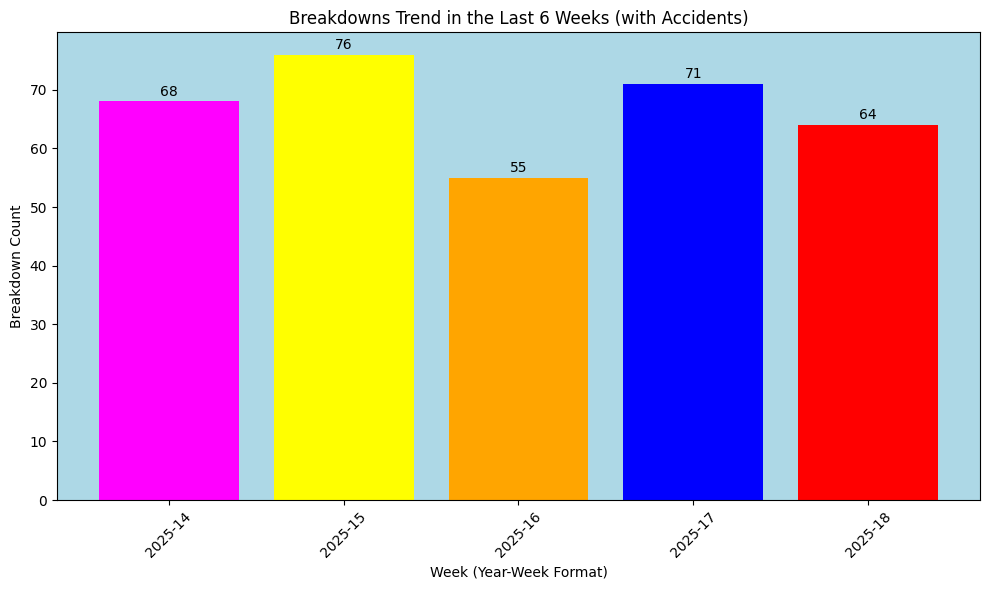

In [75]:

# Extract Year and Week for proper numerical sorting
weekly_breakdowns['Year'] = weekly_breakdowns['Year_Week'].apply(lambda x: int(x.split('-')[0]))
weekly_breakdowns['Week'] = weekly_breakdowns['Year_Week'].apply(lambda x: int(x.split('-')[1]))

# Sort by Year and Week in ascending order
weekly_breakdowns = weekly_breakdowns.sort_values(by=['Year', 'Week']).drop(columns=['Year', 'Week'])

# Define colors for the bars
colors = ['magenta', 'yellow', 'orange', 'blue', 'red', 'green']

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(weekly_breakdowns['Year_Week'], weekly_breakdowns['Breakdown Count'], color=colors)

# Add titles and labels
plt.xlabel('Week (Year-Week Format)')
plt.ylabel('Breakdown Count')
plt.title('Breakdowns Trend in the Last 6 Weeks (with Accidents)')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

# Set a light blue background for the plot
plt.gca().set_facecolor('lightblue')

# Adjust tick labels and layout
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()





In [76]:
import pandas as pd
from datetime import datetime, timedelta

# Ensure 'Incident Date' is in datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Filter out rows where 'Incident Type' is 'Accident'
no_accidents_data = data[data['Incident Type'] != 'Accident']

# Calculate the year and week number based on the ISO calendar
no_accidents_data['Year'] = no_accidents_data['Incident Date'].dt.isocalendar().year
no_accidents_data['Week'] = no_accidents_data['Incident Date'].dt.isocalendar().week

# Combine year and week to handle year transitions
no_accidents_data['Year_Week'] = (
    no_accidents_data['Year'].astype(str) + '-' + no_accidents_data['Week'].astype(str)
)

# Create a table for breakdowns by week
weekly_breakdowns_no_accidents = (
    no_accidents_data.groupby('Year_Week')['ID'].count().reset_index()
)
weekly_breakdowns_no_accidents = weekly_breakdowns_no_accidents.rename(
    columns={'ID': 'Breakdown Count'}
)

# Calculate the current week and year
current_date = datetime(2025, 5, 4)  # Replace with `datetime.now()` for dynamic calculation
start_date = current_date - timedelta(weeks=5)

# Collect all weeks between the start date and current date
weeks_to_show = []
for i in range(6):  # Last 6 weeks
    week_date = start_date + timedelta(weeks=i)
    year = week_date.isocalendar().year
    week = week_date.isocalendar().week
    weeks_to_show.append(f"{year}-{week}")

# Filter the table for the past 6 weeks
weekly_breakdowns_no_accidents = weekly_breakdowns_no_accidents[
    weekly_breakdowns_no_accidents['Year_Week'].isin(weeks_to_show)
]

# Ensure chronological order
weekly_breakdowns_no_accidents['Year'] = weekly_breakdowns_no_accidents['Year_Week'].apply(lambda x: int(x.split('-')[0]))
weekly_breakdowns_no_accidents['Week'] = weekly_breakdowns_no_accidents['Year_Week'].apply(lambda x: int(x.split('-')[1]))

weekly_breakdowns_no_accidents = weekly_breakdowns_no_accidents.sort_values(
    by=['Year', 'Week']
).drop(columns=['Year', 'Week'])

# Display the table
print("Breakdowns by Week (Past 6 Weeks) - Without Accidents:")
display(weekly_breakdowns_no_accidents)



Breakdowns by Week (Past 6 Weeks) - Without Accidents:


<ipython-input-76-0838f41ad60c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_accidents_data['Year'] = no_accidents_data['Incident Date'].dt.isocalendar().year
<ipython-input-76-0838f41ad60c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_accidents_data['Week'] = no_accidents_data['Incident Date'].dt.isocalendar().week
<ipython-input-76-0838f41ad60c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

Year_Week  Breakdown Count
43   2025-13               31
44   2025-14               59
45   2025-15               70
46   2025-16               49
47   2025-17               55
48   2025-18               55

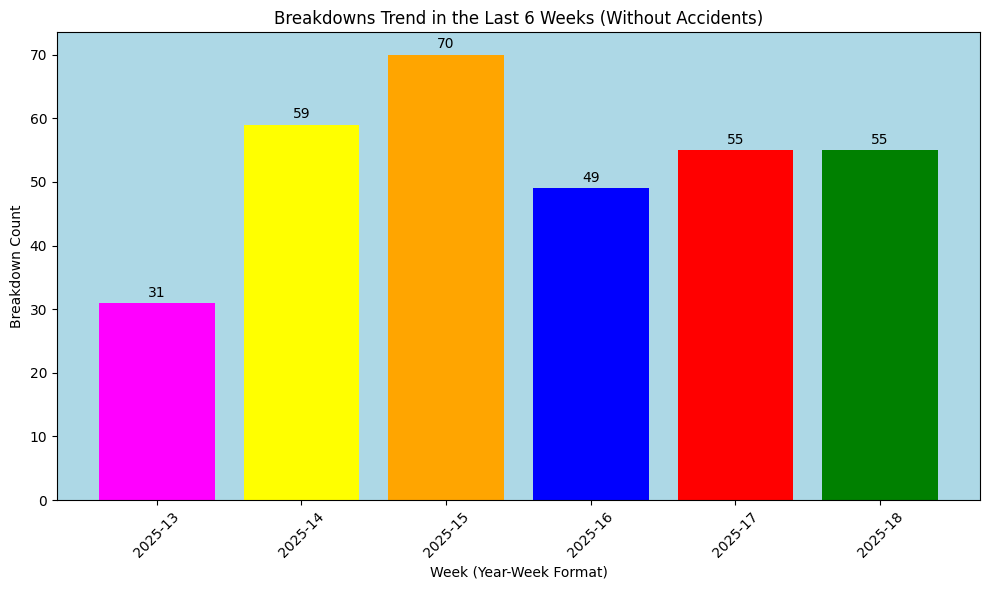

In [77]:
import matplotlib.pyplot as plt

# Ensure chronological order by sorting Year and Week numerically
weekly_breakdowns_no_accidents['Year'] = weekly_breakdowns_no_accidents['Year_Week'].apply(lambda x: int(x.split('-')[0]))
weekly_breakdowns_no_accidents['Week'] = weekly_breakdowns_no_accidents['Year_Week'].apply(lambda x: int(x.split('-')[1]))

weekly_breakdowns_no_accidents = weekly_breakdowns_no_accidents.sort_values(
    by=['Year', 'Week']
).drop(columns=['Year', 'Week'])  # Drop temporary sorting columns

# Define colors dynamically based on number of bars
colors = ['magenta', 'yellow', 'orange', 'blue', 'red', 'green']
colors = colors[:len(weekly_breakdowns_no_accidents)]  # Ensure color list matches number of bars

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(
    weekly_breakdowns_no_accidents['Year_Week'],
    weekly_breakdowns_no_accidents['Breakdown Count'],
    color=colors
)

# Add titles and labels
plt.xlabel('Week (Year-Week Format)')
plt.ylabel('Breakdown Count')
plt.title('Breakdowns Trend in the Last 6 Weeks (Without Accidents)')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

# Set a light blue background for the plot
plt.gca().set_facecolor('lightblue')

# Adjust tick labels and layout
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Week wise breakdows for last 6 months

# Breakdowns over period of time

1.Breakdowns over the time period: Count of breakdowns by month and graphical
representation.

### Breakdowns with accidents

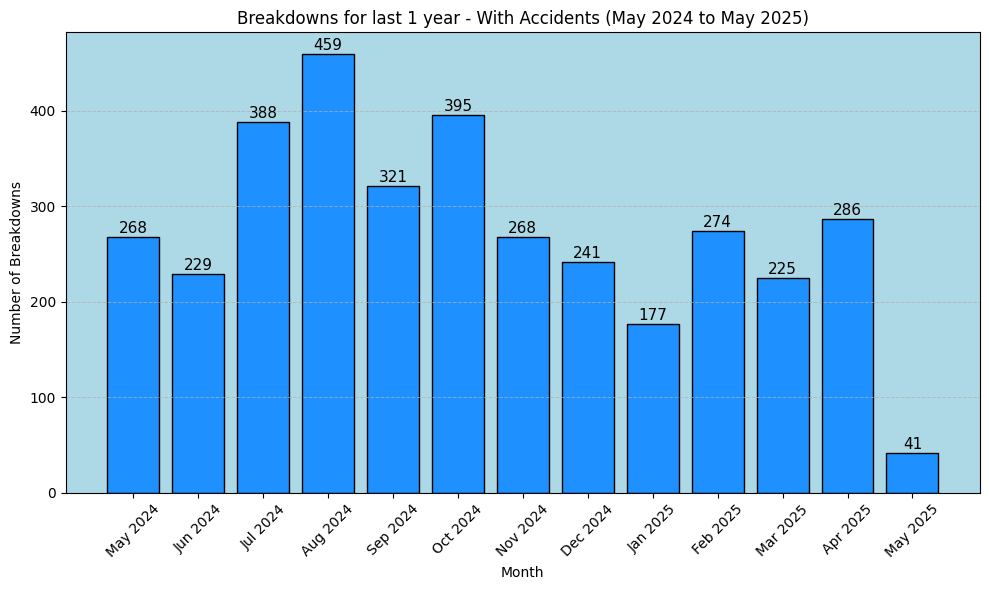

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Incident Date' is in datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Group by year and month (to avoid data shifting issues)
monthly_breakdowns = data.groupby(data['Incident Date'].dt.to_period('M'))['ID'].count()

# Convert the grouped index back to a proper datetime index
monthly_breakdowns.index = monthly_breakdowns.index.to_timestamp()

# Filter data from April 2024 to April 2025
monthly_breakdowns = monthly_breakdowns[(monthly_breakdowns.index >= '2024-05-01') & (monthly_breakdowns.index <= '2025-05-31')]

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_breakdowns.index.strftime('%b %Y'), monthly_breakdowns.values, color='dodgerblue', edgecolor='black')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Breakdowns')
plt.title('Breakdowns for last 1 year - With Accidents (May 2024 to May 2025)')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom', fontsize=11)



# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid and background styling
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()


### Breakdowns over time wihtout accidents


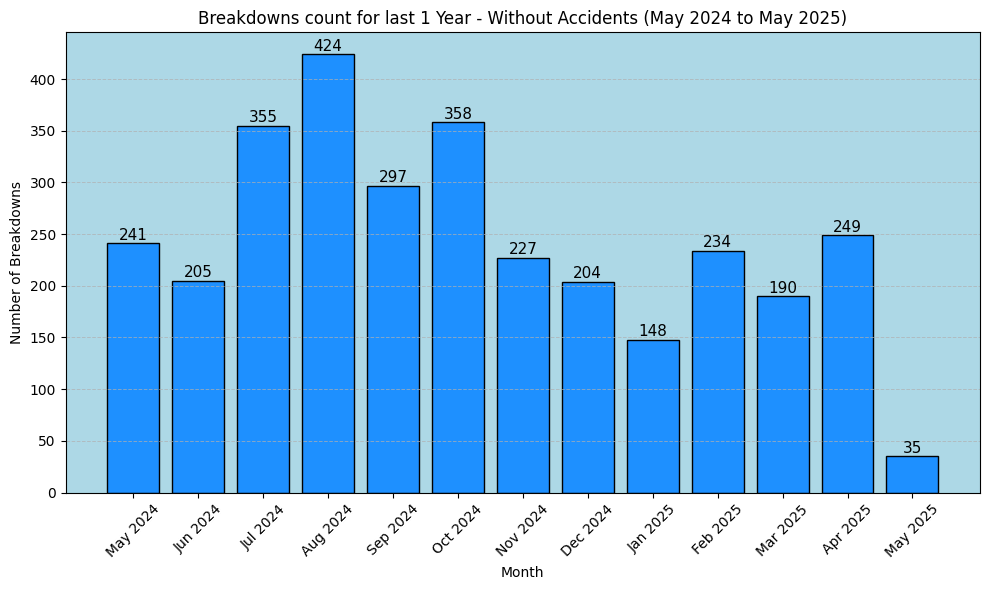

In [79]:


# Ensure 'Incident Date' is in datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Filter out accidents
data_without_accidents = data[data['Incident Type'] != 'Accident']

# Group by year and month (to avoid data shifting issues)
monthly_breakdowns = data_without_accidents.groupby(data_without_accidents['Incident Date'].dt.to_period('M'))['ID'].count()

# Convert the grouped index back to a proper datetime index
monthly_breakdowns.index = monthly_breakdowns.index.to_timestamp()

# Filter data from April 2024 to January 2025
monthly_breakdowns = monthly_breakdowns[(monthly_breakdowns.index >= '2024-05-01') & (monthly_breakdowns.index <= '2025-05-31')]

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_breakdowns.index.strftime('%b %Y'), monthly_breakdowns.values, color='dodgerblue', edgecolor='black')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Breakdowns')
plt.title('Breakdowns count for last 1 Year - Without Accidents (May 2024 to May 2025)')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=11)


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid and background styling
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()


Last 6 months breakdowns trend

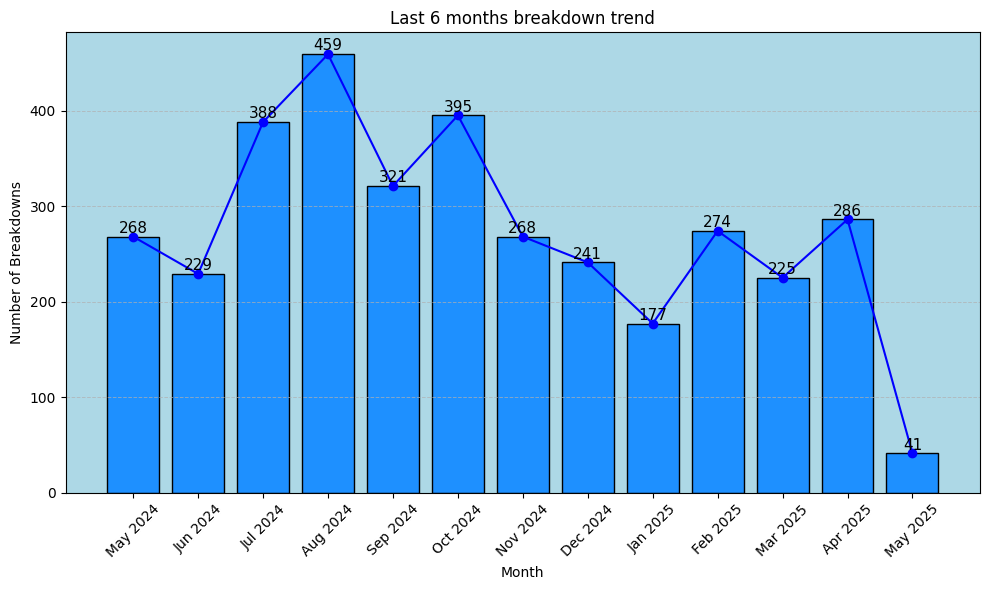

In [80]:


# Ensure 'Incident Date' is in datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Group by year and month (to avoid data shifting issues)
monthly_breakdowns = data.groupby(data['Incident Date'].dt.to_period('M'))['ID'].count()

# Convert the grouped index back to a proper datetime index
monthly_breakdowns.index = monthly_breakdowns.index.to_timestamp()

# Filter data from May 2024 to January 2025
monthly_breakdowns = monthly_breakdowns[(monthly_breakdowns.index >= '2024-05-01') & (monthly_breakdowns.index <= '2025-05-31')]

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_breakdowns.index.strftime('%b %Y'), monthly_breakdowns.values, color='dodgerblue', edgecolor='black')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Breakdowns')
plt.title('Last 6 months breakdown trend')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.8, int(yval), ha='center', va='bottom', fontsize=11)

# Add a trend line
plt.plot(monthly_breakdowns.index.strftime('%b %Y'), monthly_breakdowns.values, color='blue', marker='o', label="Trend Line")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid and background styling
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()


Breakdowns by FON

Breakdowns by FON:
FON
MMB    1633
CHN     880
BLR     793
HYD     455
COI     149
Name: ID, dtype: int64


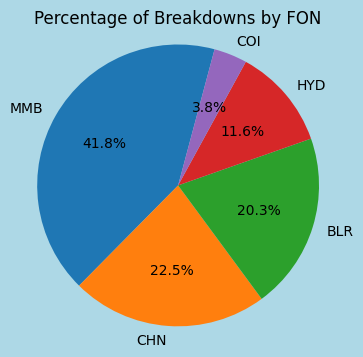

In [83]:
# Calculate count of breakdowns by FON
fon_breakdowns = data.groupby('FON')['ID'].count().sort_values(ascending=False)

# Create a table
print("Breakdowns by FON:")
print(fon_breakdowns)

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(fon_breakdowns, labels=fon_breakdowns.index, autopct='%1.1f%%', startangle=75)
plt.title('Percentage of Breakdowns by FON')

#make plot background be light blue
plt.gcf().set_facecolor('lightblue')


plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Breakdowns v/s active vehicles


Month wise % of breakdown v/s the average active vehicle.
This is imported from external spreadsheet.

Average active vehicles Month wise

In [84]:
import io
import pandas as pd
pd.read_csv(io.StringIO('''
FON,April-24,May -24,June -24,July-24,Aug-24,Sept-24,Oct -24,Nov-24,Dec-24,Jan-25,Feb-25,March-25,April-25,May-25
BLR,237,226,231,242,242,228,200,149,153,142,136,138,141,143
CHN,129,130,141,154,176,173,187,210,218,226,245,253,262,257
COI,62,61,63,77,86,95,116,127,129,132,137,147,161,168
HYD,197,193,180,182,178,190,194,200,202,204,204,211,227,229
MMB,200,236,286,301,328,329,340,360,364,366,356,356,337,332
Total,825,846,901,956,1010,1015,1036,1046,1066,1070,1078,1104,1128,1129
'''), header=None)


0         1        2         3        4       5        6        7   \
0    FON  April-24  May -24  June -24  July-24  Aug-24  Sept-24  Oct -24   
1    BLR       237      226       231      242     242      228      200   
2    CHN       129      130       141      154     176      173      187   
3    COI        62       61        63       77      86       95      116   
4    HYD       197      193       180      182     178      190      194   
5    MMB       200      236       286      301     328      329      340   
6  Total       825      846       901      956    1010     1015     1036   

       8       9       10      11        12        13      14  
0  Nov-24  Dec-24  Jan-25  Feb-25  March-25  April-25  May-25  
1     149     153     142     136       138       141     143  
2     210     218     226     245       253       262     257  
3     127     129     132     137       147       161     168  
4     200     202     204     204       211       227     229  
5     360     364     366     356       356       337     332  
6    1046    1066    1070    1078      1104      1128    1129

In [85]:
# table for count of breakdowns month wise and FON, mention month name and replace null with zero

# Group by month and FON, then count breakdowns
monthly_fon_breakdowns = data.groupby([data['Incident Date'].dt.month, 'FON'])['ID'].count().unstack().fillna(0)

# Replace month numbers with names
month_names = {
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December',
    1: 'January',
    2: 'February',
    3: 'March'

}
monthly_fon_breakdowns = monthly_fon_breakdowns.rename(index=month_names)

# Display the table
print("Count of Breakdowns Month-wise and by FON:")
print(monthly_fon_breakdowns)


Count of Breakdowns Month-wise and by FON:
FON            BLR  CHN  COI  HYD  MMB
Incident Date                         
January         35   42   15   32   53
February        27   73   25   34  115
March           42   57   10   49   67
April           70  184   20   73  277
May             65  101   12   35   96
June            58   78    1   35   57
July            89   61    5   35  198
August         123   58    7   42  229
September       87   37    5   27  165
October         99   62    3   35  196
November        53   60   23   26  106
December        45   67   23   32   74


In [86]:
# Import necessary libraries
import pandas as pd
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display

# Add Year and Month columns
data['Year'] = data['Incident Date'].dt.year
data['Month'] = data['Incident Date'].dt.month

# Group by FON, Year, and Month, and count IDs
fon_year_month_breakdowns = data.groupby(['FON', 'Year', 'Month'])['ID'].count()
fon_year_month_breakdowns = fon_year_month_breakdowns.unstack(level='Month')  # Columns = Months

# Function to display table for a selected year
def show_table_by_year_and_month(year, month):
    """Displays the breakdown table for the selected year and month."""
    subset = fon_year_month_breakdowns.loc[fon_year_month_breakdowns.index.get_level_values('Year') == year]
    if month in subset.columns:
        display(subset[[month]])
    else:
        print("No data available for the selected month.")

# Create dropdowns
year_dropdown = widgets.Dropdown(
    options=sorted(data['Year'].unique()),
    description='Year:',
    value=data['Year'].min()
)

month_dropdown = widgets.Dropdown(
    options=range(1, 13),
    description='Month:',
    value=4  # Default to April
)

# Interactive view
interact(show_table_by_year_and_month, year=year_dropdown, month=month_dropdown);


interactive(children=(Dropdown(description='Year:', options=(np.int32(2024), np.int32(2025)), value=np.int32(2…

In [88]:
# Step 1: Filter out accidents
data_no_accidents = data[data['Incident Type'] != 'Accident']

# Step 2: Extract Year and Month from 'Incident Date'
data_no_accidents['Year'] = data_no_accidents['Incident Date'].dt.year
data_no_accidents['Month'] = data_no_accidents['Incident Date'].dt.month

# Step 3: Group by FON, Year, and Month and count IDs
fon_year_month_no_accidents = data_no_accidents.groupby(['FON', 'Year', 'Month'])['ID'].count()
fon_year_month_no_accidents = fon_year_month_no_accidents.unstack(level='Month')  # Columns = Months

# Step 4: Define interactive display function
def show_table_no_accidents_by_year_and_month(year, month):
    """Displays the breakdowns table for the selected year and month (excluding accidents)."""
    subset = fon_year_month_no_accidents.loc[fon_year_month_no_accidents.index.get_level_values('Year') == year]
    if month in subset.columns:
        display(subset[[month]])
    else:
        print("No data available for the selected month.")

# Step 5: Create interactive dropdowns
year_dropdown_no_accidents = widgets.Dropdown(
    options=sorted(data_no_accidents['Year'].unique()),
    value=data_no_accidents['Year'].min(),
    description='Year:',
)

month_dropdown_no_accidents = widgets.Dropdown(
    options=range(1, 13),
    value=4,  # Default April
    description='Month:',
)

# Step 6: Display interactive widget
interact(show_table_no_accidents_by_year_and_month, year=year_dropdown_no_accidents, month=month_dropdown_no_accidents);


<ipython-input-88-b165c31e6338>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_accidents['Year'] = data_no_accidents['Incident Date'].dt.year
<ipython-input-88-b165c31e6338>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_accidents['Month'] = data_no_accidents['Incident Date'].dt.month


interactive(children=(Dropdown(description='Year:', options=(np.int32(2024), np.int32(2025)), value=np.int32(2…

## Import % of breakdown by Avg active vehicle from Google sheet "Active vehicles v/s breakdowns"

## April 2024 to MTD breakdowns % trend

### With Accidents

In [89]:
import io
import pandas as pd
pd.read_csv(io.StringIO('''
Year,Months,BLR,CHN,COI,HYD,MMB
2024,Apr,0.45%,2.38%,0.48%,0.69%,2.73%
2024,May,0.81%,2.21%,0.11%,0.62%,1.13%
2024,June,0.84%,1.84%,0.00%,0.67%,0.66%
2024,Jul,1.19%,1.28%,0.07%,1.51%,2.12%
2024,Aug,1.64%,1.06%,0.26%,0.76%,2.25%
2024,Sep,1.27%,0.72%,0.18%,0.47%,1.67%
2024,Oct,1.60%,1.07%,0.08%,0.58%,1.86%
2024,Nov,1.19%,0.97%,0.60%,0.43%,0.98%
2024,Dec,0.96%,0.99%,0.57%,0.50%,0.65%
2025,Jan,0.80%,0.60%,0.37%,0.51%,0.47%
2025,Feb,0.71%,1.06%,0.65%,0.60%,1.15%
2025,March,0.98%,0.73%,0.22%,0.75%,0.61%
2025,April,0.90%,1.17%,0.23%,0.47%,1.12%
2025,May,1.40%,1.17%,0.89%,0.22%,0.98%
'''), header=None)


0       1      2      3      4      5      6
0   Year  Months    BLR    CHN    COI    HYD    MMB
1   2024     Apr  0.45%  2.38%  0.48%  0.69%  2.73%
2   2024     May  0.81%  2.21%  0.11%  0.62%  1.13%
3   2024    June  0.84%  1.84%  0.00%  0.67%  0.66%
4   2024     Jul  1.19%  1.28%  0.07%  1.51%  2.12%
5   2024     Aug  1.64%  1.06%  0.26%  0.76%  2.25%
6   2024     Sep  1.27%  0.72%  0.18%  0.47%  1.67%
7   2024     Oct  1.60%  1.07%  0.08%  0.58%  1.86%
8   2024     Nov  1.19%  0.97%  0.60%  0.43%  0.98%
9   2024     Dec  0.96%  0.99%  0.57%  0.50%  0.65%
10  2025     Jan  0.80%  0.60%  0.37%  0.51%  0.47%
11  2025     Feb  0.71%  1.06%  0.65%  0.60%  1.15%
12  2025   March  0.98%  0.73%  0.22%  0.75%  0.61%
13  2025   April  0.90%  1.17%  0.23%  0.47%  1.12%
14  2025     May  1.40%  1.17%  0.89%  0.22%  0.98%

In [90]:
!pip install adjustText


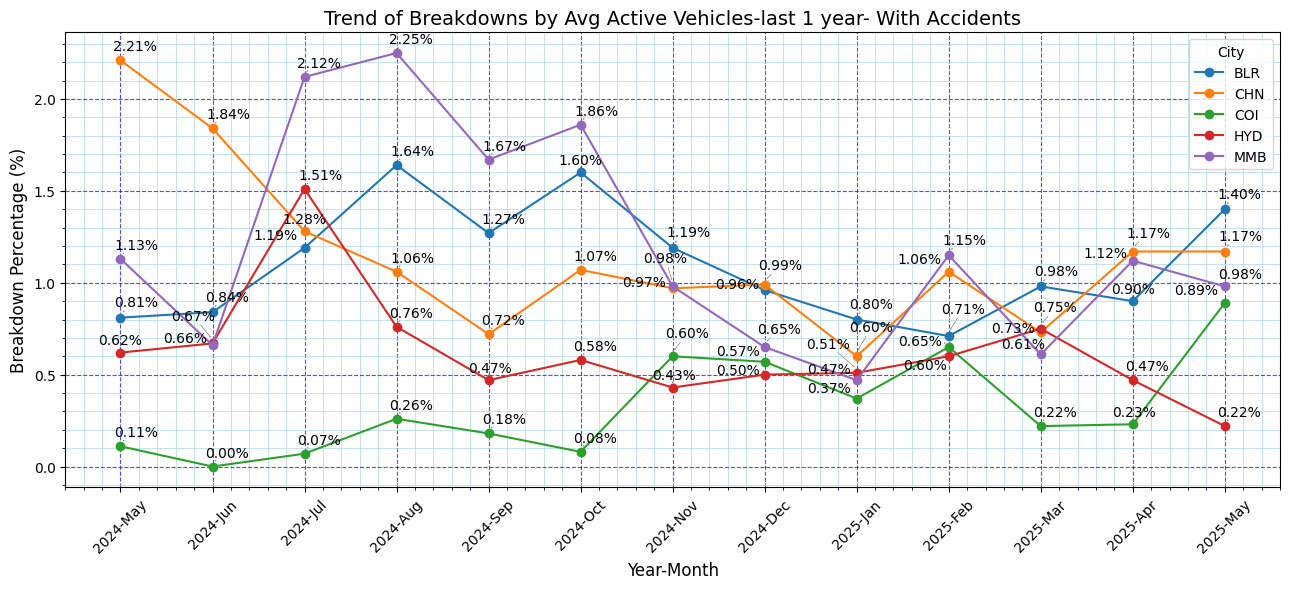

In [92]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Data with percentage values (with accidents)
data1 = '''
Year,Months,BLR,CHN,COI,HYD,MMB
2024,May,0.81%,2.21%,0.11%,0.62%,1.13%
2024,June,0.84%,1.84%,0.00%,0.67%,0.66%
2024,Jul,1.19%,1.28%,0.07%,1.51%,2.12%
2024,Aug,1.64%,1.06%,0.26%,0.76%,2.25%
2024,Sep,1.27%,0.72%,0.18%,0.47%,1.67%
2024,Oct,1.60%,1.07%,0.08%,0.58%,1.86%
2024,Nov,1.19%,0.97%,0.60%,0.43%,0.98%
2024,Dec,0.96%,0.99%,0.57%,0.50%,0.65%
2025,Jan,0.80%,0.60%,0.37%,0.51%,0.47%
2025,Feb,0.71%,1.06%,0.65%,0.60%,1.15%
2025,March,0.98%,0.73%,0.22%,0.75%,0.61%
2025,April,0.90%,1.17%,0.23%,0.47%,1.12%
2025,May,1.40%,1.17%,0.89%,0.22%,0.98%
'''

# Read the data
df = pd.read_csv(io.StringIO(data1), dtype=str)

# Convert percentage values to float
for col in df.columns[2:]:
    df[col] = df[col].str.rstrip('%').astype(float)

# Handle mixed-format months
df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Months'], format='mixed')

# Sort by date to ensure correct plotting order
df = df.sort_values('Date')

# Create label column like "2024-Apr"
df['Label'] = df['Date'].dt.strftime('%Y-%b')

# Plotting
plt.figure(figsize=(13, 6))
for city in df.columns[2:7]:  # Plot cities
    plt.plot(df['Label'], df[city], label=city, marker='o')

# Add data labels
texts = []
for city in df.columns[2:7]:
    for x, y in zip(df['Label'], df[city]):
        texts.append(plt.text(x, y + 0.02, f'{y:.2f}%', ha='center', va='bottom', fontsize=10))

adjust_text(texts, only_move={'points': 'y', 'text': 'y'},
            arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Customizations
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Breakdown Percentage (%)', fontsize=12)
plt.title('Trend of Breakdowns by Avg Active Vehicles-last 1 year- With Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='City', loc="upper right")
plt.grid(True, linestyle='--', alpha=0.7, color='blue')
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', linewidth=0.5, color='lightblue')
plt.tight_layout()
plt.show()






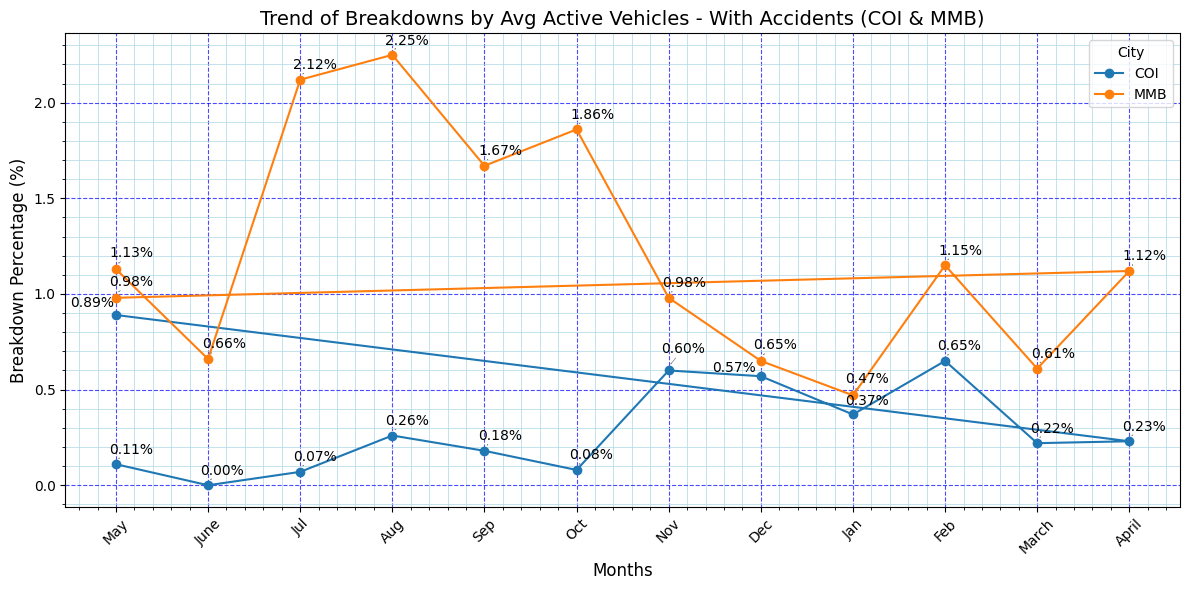

In [94]:
#Filter for COI and MMB

# Filter the DataFrame to include only 'COI' and 'MMB'
df_coi_mmb = df[['Months', 'COI', 'MMB']]

# Line plot
plt.figure(figsize=(12, 6))
for city in df_coi_mmb.columns[1:]:  # Skip 'Months'
    plt.plot(df_coi_mmb['Months'], df_coi_mmb[city], label=city, marker='o')

# Collect all text annotations
texts = []
for city in df_coi_mmb.columns[1:]:
    for x, y in zip(df_coi_mmb['Months'], df_coi_mmb[city]):
        texts.append(plt.text(x, y + 0.02, f'{y:.2f}%', ha='center', va='bottom', fontsize=10))

# Adjust text to prevent overlap
adjust_text(texts, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Plot settings
plt.xlabel('Months', fontsize=12)
plt.ylabel('Breakdown Percentage (%)', fontsize=12)
plt.title('Trend of Breakdowns by Avg Active Vehicles - With Accidents (COI & MMB)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='City', loc="upper right")
plt.grid(True, linestyle='--', alpha=0.7, color='blue')
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', linewidth=0.5, color='lightblue')
plt.tight_layout()

# Show plot
plt.show()


### Without Accidents

In [95]:
import io
import pandas as pd
pd.read_csv(io.StringIO('''
Year,Months,BLR,CHN,COI,HYD,MMB
2024,Apr,0.38%,2.27%,0.48%,0.63%,2.65%
2024,May,0.70%,2.06%,0.16%,0.48%,1.05%
2024,June,0.69%,1.75%,0.00%,0.52%,0.64%
2024,Jul,1.00%,1.21%,0.04%,0.96%,2.11%
2024,Aug,1.43%,0.97%,0.08%,0.62%,2.24%
2024,Sep,1.15%,0.68%,0.11%,0.44%,1.57%
2024,Oct,1.45%,1.02%,0.06%,0.53%,1.78%
2024,Nov,0.94%,0.87%,0.44%,0.30%,0.88%
2024,Dec,0.72%,0.92%,0.37%,0.44%,0.57%
2025,Jan,0.73%,0.53%,0.27%,0.36%,0.40%
2025,Feb,0.58%,1.03%,0.50%,0.44%,0.97%
2025,March,0.72%,0.69%,0.09%,0.57%,0.58%
2025,April,0.69%,1.04%,0.14%,0.38%,1.04%
2025,May,1.22%,1.07%,0.74%,0.22%,0.75%
'''), header=None)


0       1      2      3      4      5      6
0   Year  Months    BLR    CHN    COI    HYD    MMB
1   2024     Apr  0.38%  2.27%  0.48%  0.63%  2.65%
2   2024     May  0.70%  2.06%  0.16%  0.48%  1.05%
3   2024    June  0.69%  1.75%  0.00%  0.52%  0.64%
4   2024     Jul  1.00%  1.21%  0.04%  0.96%  2.11%
5   2024     Aug  1.43%  0.97%  0.08%  0.62%  2.24%
6   2024     Sep  1.15%  0.68%  0.11%  0.44%  1.57%
7   2024     Oct  1.45%  1.02%  0.06%  0.53%  1.78%
8   2024     Nov  0.94%  0.87%  0.44%  0.30%  0.88%
9   2024     Dec  0.72%  0.92%  0.37%  0.44%  0.57%
10  2025     Jan  0.73%  0.53%  0.27%  0.36%  0.40%
11  2025     Feb  0.58%  1.03%  0.50%  0.44%  0.97%
12  2025   March  0.72%  0.69%  0.09%  0.57%  0.58%
13  2025   April  0.69%  1.04%  0.14%  0.38%  1.04%
14  2025     May  1.22%  1.07%  0.74%  0.22%  0.75%

24 [0.07844582 0.09191371]
63 [0.48232886 0.12398856]


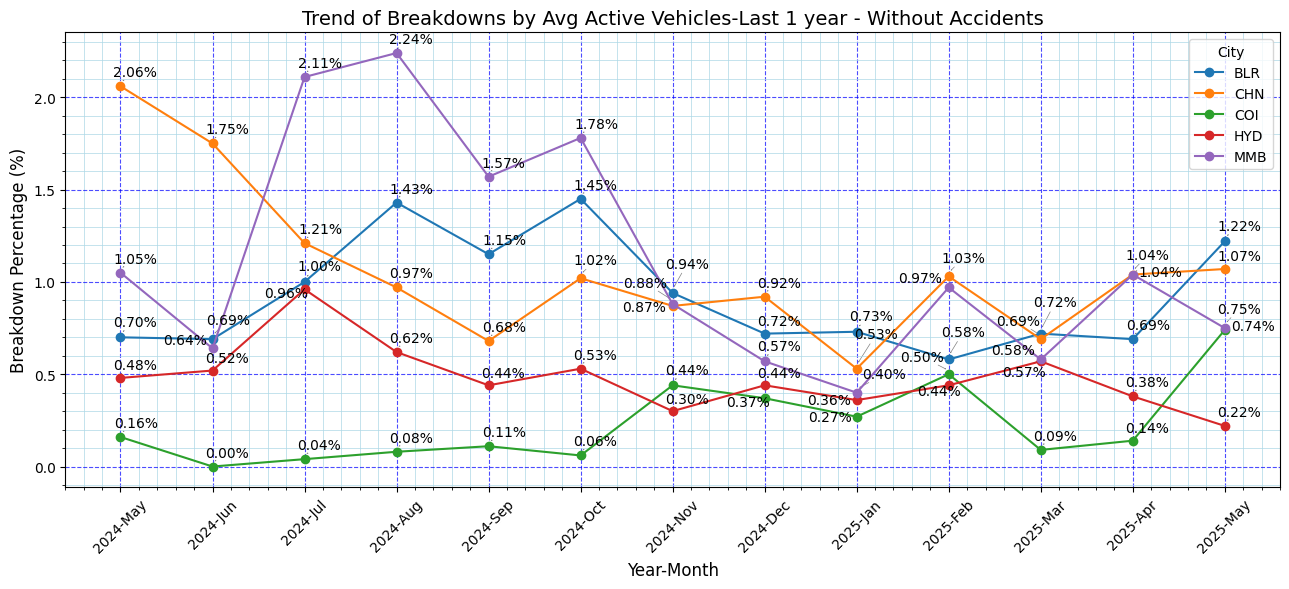

In [96]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Data with percentage values (without accidents)
data1 = '''
Year,Months,BLR,CHN,COI,HYD,MMB
2024,May,0.70%,2.06%,0.16%,0.48%,1.05%
2024,June,0.69%,1.75%,0.00%,0.52%,0.64%
2024,Jul,1.00%,1.21%,0.04%,0.96%,2.11%
2024,Aug,1.43%,0.97%,0.08%,0.62%,2.24%
2024,Sep,1.15%,0.68%,0.11%,0.44%,1.57%
2024,Oct,1.45%,1.02%,0.06%,0.53%,1.78%
2024,Nov,0.94%,0.87%,0.44%,0.30%,0.88%
2024,Dec,0.72%,0.92%,0.37%,0.44%,0.57%
2025,Jan,0.73%,0.53%,0.27%,0.36%,0.40%
2025,Feb,0.58%,1.03%,0.50%,0.44%,0.97%
2025,March,0.72%,0.69%,0.09%,0.57%,0.58%
2025,April,0.69%,1.04%,0.14%,0.38%,1.04%
2025,May,1.22%,1.07%,0.74%,0.22%,0.75%
'''

# Read the data
df = pd.read_csv(io.StringIO(data1), dtype=str)

# Convert percentage strings to float
for col in df.columns[2:]:
    df[col] = df[col].str.rstrip('%').astype(float)

# Use 'mixed' format to handle both full and abbreviated month names
df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Months'], format='mixed')

# Sort by date
df = df.sort_values('Date')

# Create x-axis labels like '2024-Apr'
df['Label'] = df['Date'].dt.strftime('%Y-%b')

# Plotting
plt.figure(figsize=(13, 6))
for city in df.columns[2:7]:
    plt.plot(df['Label'], df[city], label=city, marker='o')

# Add value labels
texts = []
for city in df.columns[2:7]:
    for x, y in zip(df['Label'], df[city]):
        texts.append(plt.text(x, y + 0.02, f'{y:.2f}%', ha='center', va='bottom', fontsize=10))

adjust_text(texts, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Customize chart
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Breakdown Percentage (%)', fontsize=12)
plt.title('Trend of Breakdowns by Avg Active Vehicles-Last 1 year - Without Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='City', loc="upper right")
plt.grid(True, linestyle='--', alpha=0.7, color='blue')
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', linewidth=0.5, color='lightblue')
plt.tight_layout()
plt.show()


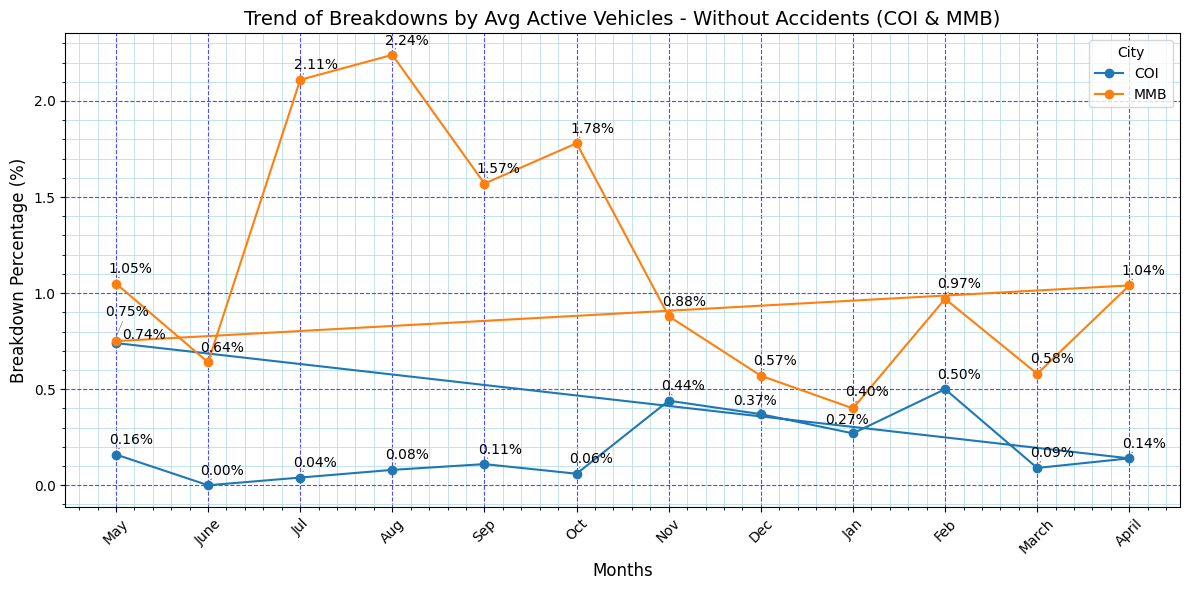

In [97]:
#graph just for COI and MMB

import matplotlib.pyplot as plt
# Assuming 'df' DataFrame is already loaded and processed as in the previous code.

# Filter the DataFrame to include only 'COI' and 'MMB' (without accidents)
df_coi_mmb = df[['Months', 'COI', 'MMB']]

# Line plot
plt.figure(figsize=(12, 6))
for city in df_coi_mmb.columns[1:]:  # Skip 'Months'
    plt.plot(df_coi_mmb['Months'], df_coi_mmb[city], label=city, marker='o')

# Collect all text annotations
texts = []
for city in df_coi_mmb.columns[1:]:
    for x, y in zip(df_coi_mmb['Months'], df_coi_mmb[city]):
        texts.append(plt.text(x, y + 0.02, f'{y:.2f}%', ha='center', va='bottom', fontsize=10))

# Adjust text to prevent overlap
adjust_text(texts, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Plot settings
plt.xlabel('Months', fontsize=12)
plt.ylabel('Breakdown Percentage (%)', fontsize=12)
plt.title('Trend of Breakdowns by Avg Active Vehicles - Without Accidents (COI & MMB)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='City', loc="upper right")
plt.grid(True, linestyle='--', alpha=0.7, color='blue')
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', linewidth=0.5, color='lightblue')
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
df

Year Months   BLR   CHN   COI   HYD   MMB
0   2024    Apr  0.38  2.27  0.48  0.63  2.65
1   2024    May  0.70  2.06  0.16  0.48  1.05
2   2024   June  0.69  1.75  0.00  0.52  0.64
3   2024    Jul  1.00  1.21  0.04  0.96  2.11
4   2024    Aug  1.43  0.97  0.08  0.62  2.24
5   2024    Sep  1.15  0.68  0.11  0.44  1.57
6   2024    Oct  1.45  1.02  0.06  0.53  1.78
7   2024    Nov  0.94  0.87  0.44  0.30  0.88
8   2024    Dec  0.72  0.92  0.37  0.44  0.57
9   2025    Jan  0.73  0.53  0.27  0.36  0.40
10  2025    Feb  0.58  1.03  0.50  0.44  0.97
11  2025  March  0.69  0.78  0.04  0.64  0.58

In [ ]:
data

ID                vin RTO Registration Number           FOS  \
0     IR202503165  MD9B55CWWPD558770              KA53AB1260       Huskuru   
1     IR202503164  MD9B30CWWND558400              KA53AA6111    Nagelkenni   
2     IR202503163  MD9B30CWWNC558349               TN85R9214    Nagelkenni   
3     IR202503162  MD9B30CWWMJ558177              KA53AA4808    Nagelkenni   
4     IR202503161  MD9B30CWWNE558501              KA53AA8349      Nacharam   
...           ...                ...                     ...           ...   
4245    IR0402245          CHA464465              MH04KX1291         Sewri   
4246    IR0402244  MD9B30CWWMA558015              KA53AA3157  Banashankari   
4252   IR04012410  MD9B55CWWPD558810              MH04KX8326      Bhiwandi   
4253    IR0401249  MD9B30CWWNA558276              MH04KX8332      Bhiwandi   
4260    IR0401242  MD9B30CWWMM558253              KA53AA4894      Hulimavu   

      FON Incident Date  Incident Time  \
0     BLR    2025-03-16          16.07   
1     CHN    2025-03-16          10.25   
2     CHN    2025-03-16          10.25   
3     CHN    2025-03-16           5.25   
4     HYD    2025-03-16           9.49   
...   ...           ...            ...   
4245  MMB    2024-04-02          10.05   
4246  BLR    2024-04-02          10.05   
4252  MMB    2024-04-01          10.47   
4253  MMB    2024-04-01           9.48   
4260  BLR    2024-04-01           6.17   

                                   Incident Description Injury Injury Details  \
0                                      front fork issue    YES             na   
1                        Vehicle not moving conditions      NO            NaN   
2                        Vehicle not moving conditions      NO            NaN   
3                        Vehicle not moving conditions      NO            NaN   
4                                  Font mudguard damage     NO            NaN   
...                                                 ...    ...            ...   
4245      Vehicle Having Battery Issue, and Horn Issue.     NO            NaN   
4246  While going to Ninjacart customer delivery, wh...     NO            NaN   
4252  Due to brake issue in the vehicle, the vehicle...     NO            NaN   
4253  Due to brake issue in the vehicle, the vehicle...     NO            NaN   
4260  As per technician update getting motor issue i...     NO            NaN   

      ... Incident Type    Status Responsiblity  \
0     ...    Mechanical   CREATED           NaN   
1     ...    Mechanical   CREATED           NaN   
2     ...    Mechanical   CREATED           NaN   
3     ...    Mechanical   CREATED           NaN   
4     ...      Accident  RESOLVED          3eco   
...   ...           ...       ...           ...   
4245  ...    Mechanical  RESOLVED           NaN   
4246  ...      Accident  RESOLVED           NaN   
4252  ...    Mechanical  RESOLVED           NaN   
4253  ...    Mechanical  RESOLVED           NaN   
4260  ...    Electrical  RESOLVED           NaN   

                                         Root cause Date of Closure  \
0                                               NaN             NaT   
1                    Vehicle not moving conditions              NaT   
2                    Vehicle not moving conditions              NaT   
3                    Vehicle not moving conditions              NaT   
4                                               NaN      2025-03-17   
...                                             ...             ...   
4245  Vehicle Having Battery Issue, and Horn Issue.             NaT   
4246                                            NaN             NaT   
4252                                            NaN             NaT   
4253                                            NaN             NaT   
4260                                            NaN             NaT   

     Time of Closure    Month  Year Week  Year_Week  
0                NaN  2025-03  2025   11    2025-11  
1                NaN  2025

### Breakdowns for last 90 days , with accidents and without accidents.

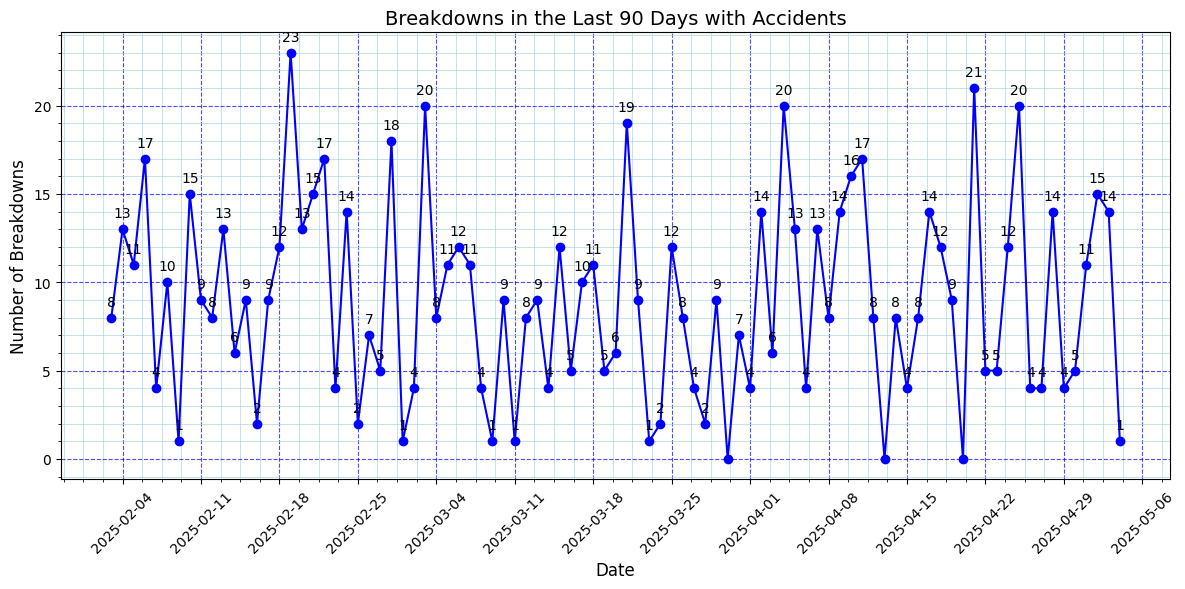

In [98]:

import matplotlib.dates as mdates
from datetime import datetime

# Define end_date as 13 april (or use `datetime.today()` for dynamic calculation)
end_date = datetime(2025, 5, 4)  # Replace with `datetime.today()` if needed

# Ensure 'Incident Date' is in datetime format
data['Incident Date'] = pd.to_datetime(data['Incident Date'])

# Filter data for the last 90 days from 2nd March
start_date = end_date - pd.DateOffset(days=90)
last_90_days_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

# Group data by date and count breakdowns
daily_breakdowns = last_90_days_data.groupby('Incident Date')['ID'].count()

# Reindex to include all dates in the range, filling missing dates with zero
all_dates = pd.date_range(start=start_date, end=end_date)
daily_breakdowns = daily_breakdowns.reindex(all_dates, fill_value=0)

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_breakdowns.index, daily_breakdowns.values, marker='o', linestyle='-', color='blue')

# Add data labels dynamically
for x, y in zip(daily_breakdowns.index, daily_breakdowns.values):
    if y > 0:  # Show labels only for non-zero values
        plt.text(x, y + 0.5, str(y), ha='center', va='bottom', fontsize=10)

# Customize the chart
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Breakdowns', fontsize=12)
plt.title('Breakdowns in the Last 90 Days with Accidents', fontsize=14)
plt.xticks(rotation=45)

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Major ticks on weekly intervals
plt.gca().xaxis.set_minor_locator(mdates.DayLocator())  # Minor ticks on daily intervals

# Major gridlines (dashed blue)
plt.grid(True, linestyle='--', alpha=0.7, color='blue')

# Minor gridlines (finer, lighter blue)
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', linewidth=0.5, color='lightblue')

# Show the plot
plt.tight_layout()
plt.show()


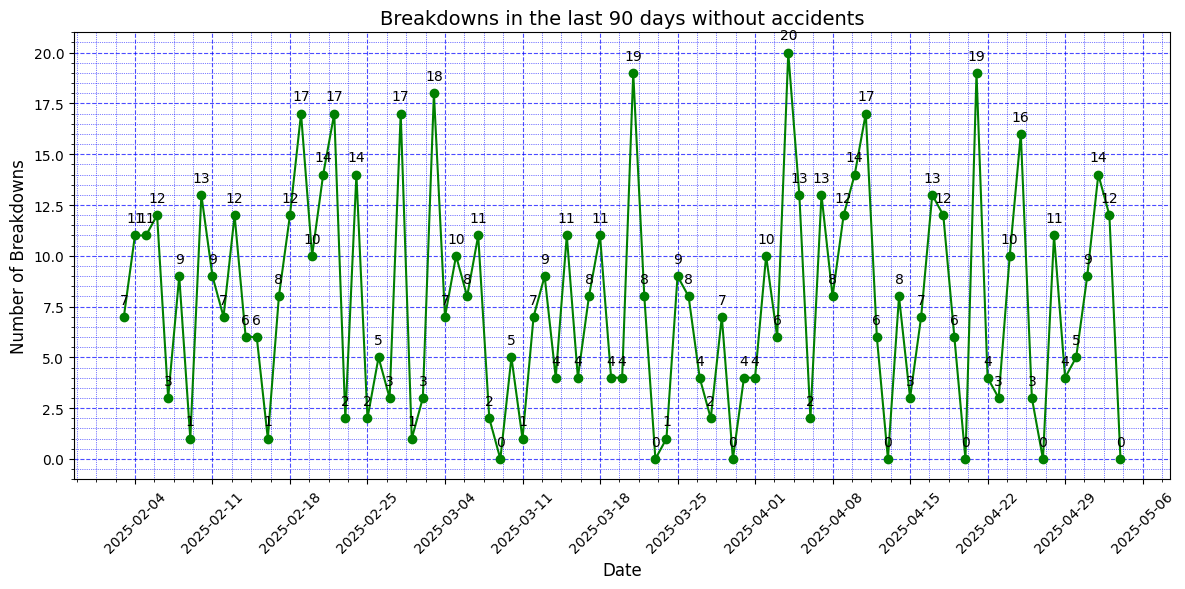

In [99]:
#  Breakdowns for last 90 days , without accidents.


# Filter data for the last 90 days from 13 APril
start_date = end_date - pd.DateOffset(days=90)
last_90_days_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

# Filter out rows with 'Incident Type' as 'Accident'
last_90_days_data_no_accidents = last_90_days_data[last_90_days_data['Incident Type'] != 'Accident']

# Group data by date and count breakdowns
daily_breakdowns_no_accidents = last_90_days_data_no_accidents.groupby('Incident Date')['ID'].count()

# Reindex to include all dates in the range, filling missing dates with zero
all_dates = pd.date_range(start=start_date, end=end_date)
daily_breakdowns_no_accidents = daily_breakdowns_no_accidents.reindex(all_dates, fill_value=0)


# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_breakdowns_no_accidents.index, daily_breakdowns_no_accidents.values, marker='o',color='green')

# Add data labels
for x, y in zip(daily_breakdowns_no_accidents.index, daily_breakdowns_no_accidents.values):
    plt.text(x, y + 0.5, y, ha='center', va='bottom', fontsize=10)

# Customize the chart
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Breakdowns', fontsize=12)
plt.title('Breakdowns in the last 90 days without accidents', fontsize=14)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Major ticks on weekly intervals
plt.gca().xaxis.set_minor_locator(mdates.DayLocator())  # Minor ticks on daily intervals
plt.tight_layout()

# Major gridlines (dashed blue)
plt.grid(True, linestyle='--', alpha=0.7, color='blue')

# Minor gridlines (finer, lighter blue)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='blue')

# Show the plot
plt.show()

## Last 30 days


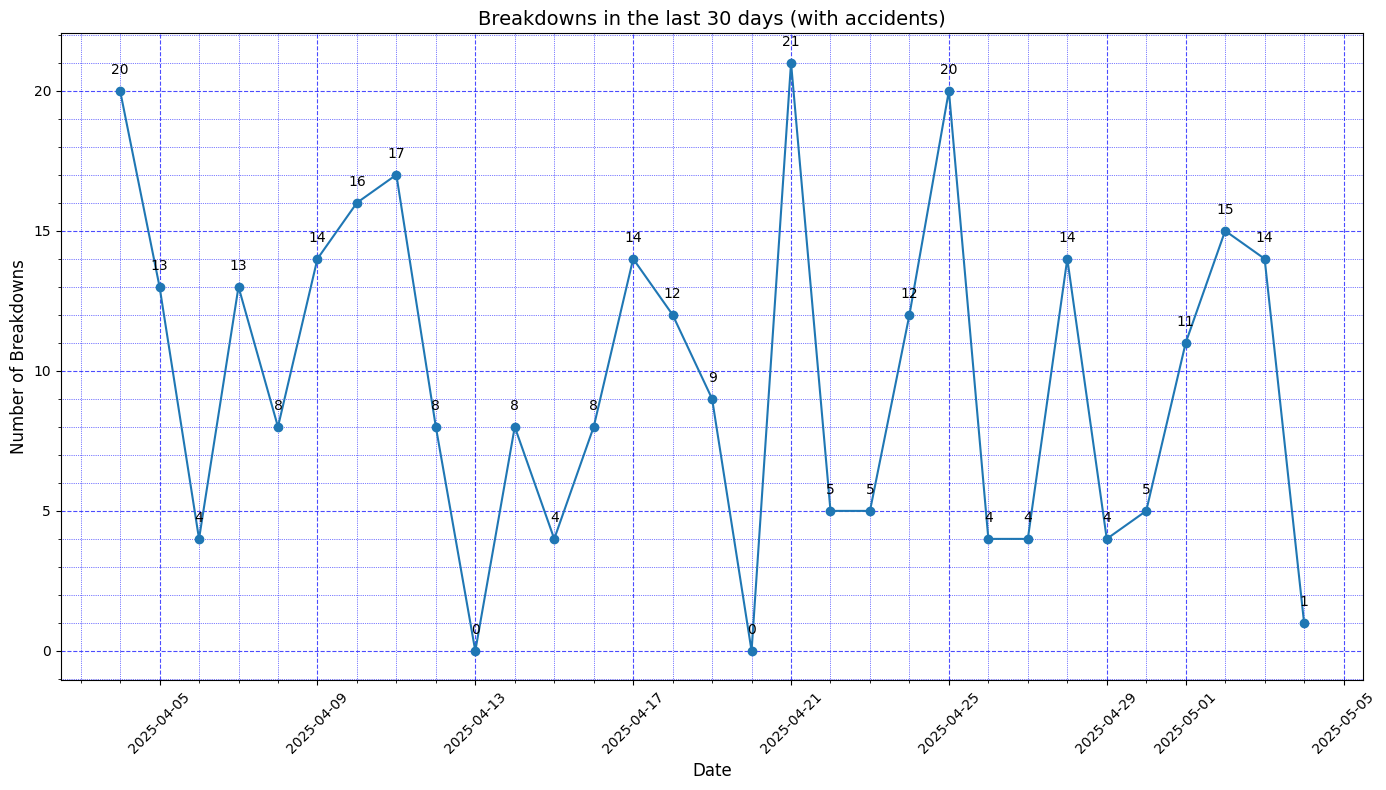

In [100]:

from datetime import datetime, timedelta

# Assuming 'data' DataFrame is available as in the original code

def plot_breakdowns_last_30_days(data, with_accidents=True):
    end_date = datetime(2025, 5, 4)  # Fixed end date
    start_date = end_date - timedelta(days=30)

    filtered_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

    if not with_accidents:
        filtered_data = filtered_data[filtered_data['Incident Type'] != 'Accident']

    daily_breakdowns = filtered_data.groupby('Incident Date')['ID'].count()
    all_dates = pd.date_range(start=start_date, end=end_date)
    daily_breakdowns = daily_breakdowns.reindex(all_dates, fill_value=0)

    plt.figure(figsize=(14, 8))
    plt.plot(daily_breakdowns.index, daily_breakdowns.values, marker='o')

    for x, y in zip(daily_breakdowns.index, daily_breakdowns.values):
        plt.text(x, y + 0.5, y, ha='center', va='bottom', fontsize=10)

    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Breakdowns', fontsize=12)
    title = 'Breakdowns in the last 30 days'
    if with_accidents:
        title += ' (with accidents)'
    else:
        title += ' (without accidents)'
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
# Major gridlines (dashed blue)
    plt.grid(True, linestyle='--', alpha=0.7, color='blue')

# Minor gridlines (finer, lighter blue)
    plt.minorticks_on()
    plt.grid(which='minor', linestyle=':', linewidth=0.5, color='blue')

    plt.show()


# Example usage (assuming 'data' DataFrame is available):
plot_breakdowns_last_30_days(data, with_accidents=True)


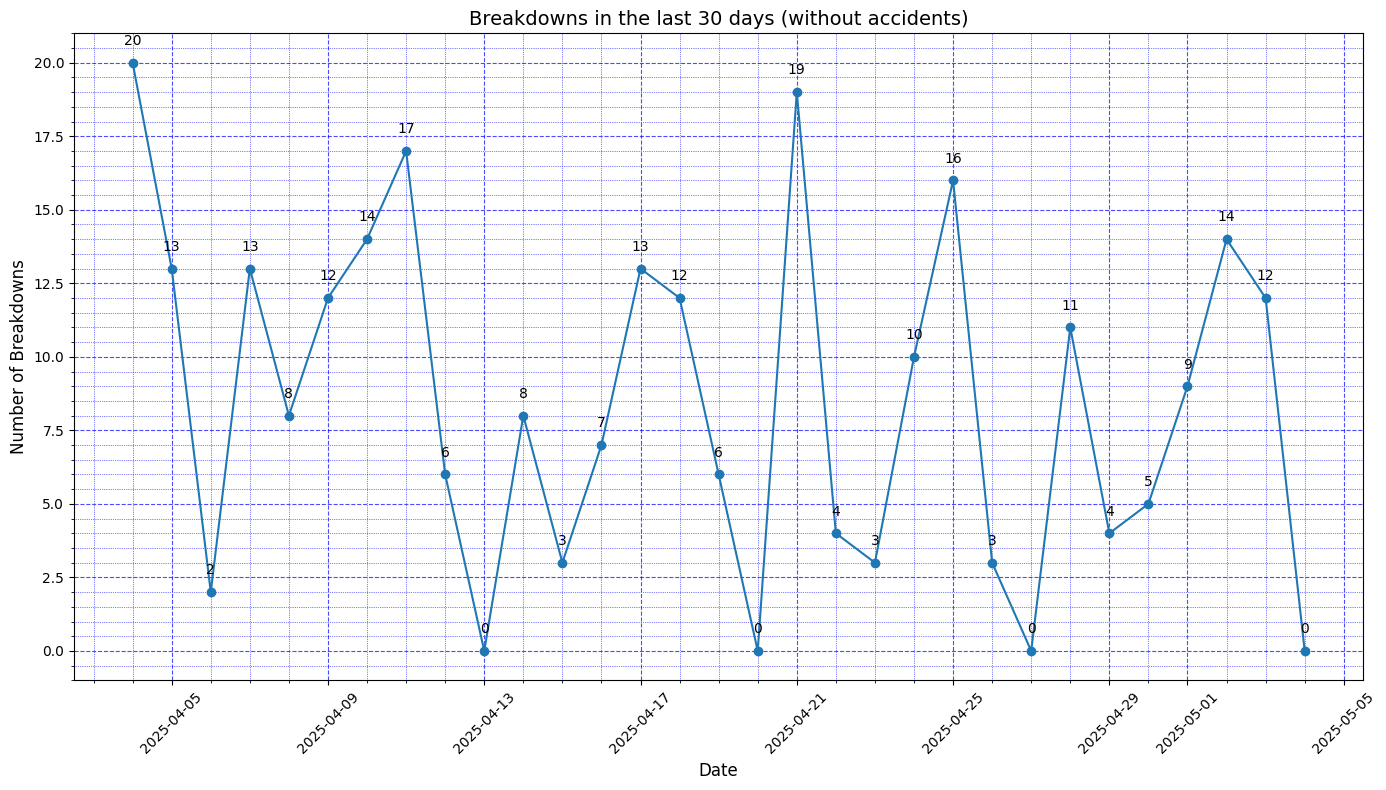

In [101]:
plot_breakdowns_last_30_days(data, with_accidents=False)


### Accidents from last 6 months

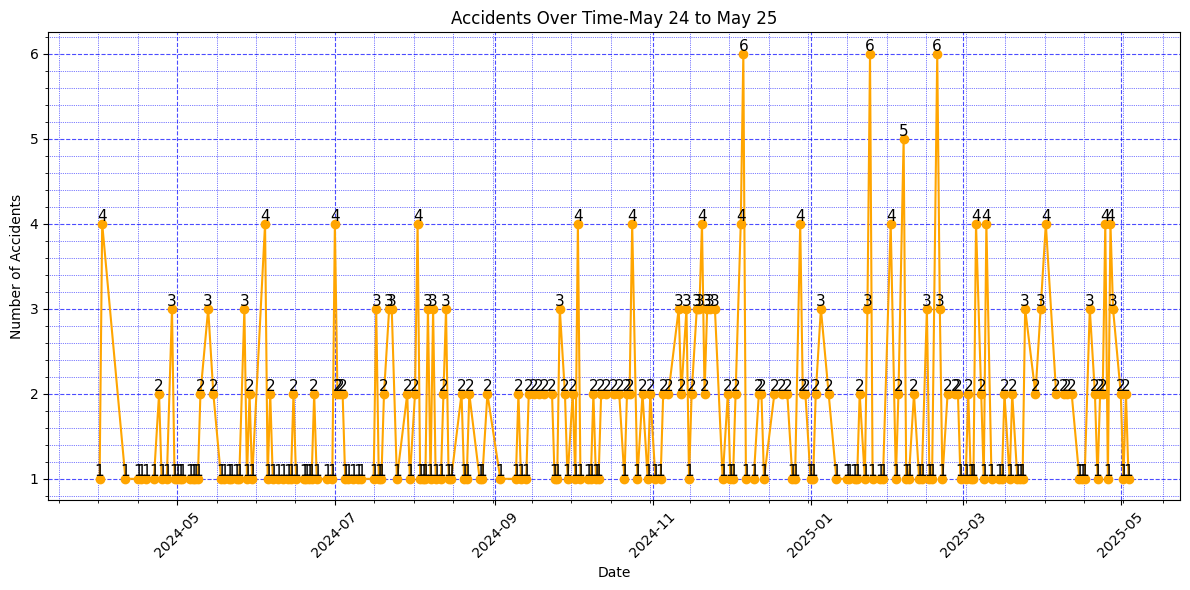

In [106]:

# Filter data for accidents only
accident_data = data[data['Incident Type'] == 'Accident']

# Group by date and count accidents
daily_accidents = accident_data.groupby('Incident Date')['ID'].count()

# Create a visually appealing line graph
plt.figure(figsize=(12, 6))
plt.plot(daily_accidents.index, daily_accidents.values, marker='o', linestyle='-', color='orange')

# Add data labels to the points
for x, y in zip(daily_accidents.index, daily_accidents.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=11)


plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.title('Accidents Over Time-May 24 to May 25')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
# Major gridlines (dashed blue)
plt.grid(True, linestyle='--', alpha=0.7, color='blue')

# Minor gridlines (finer, lighter blue)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='blue')
plt.show()


Accidents over last 6 months

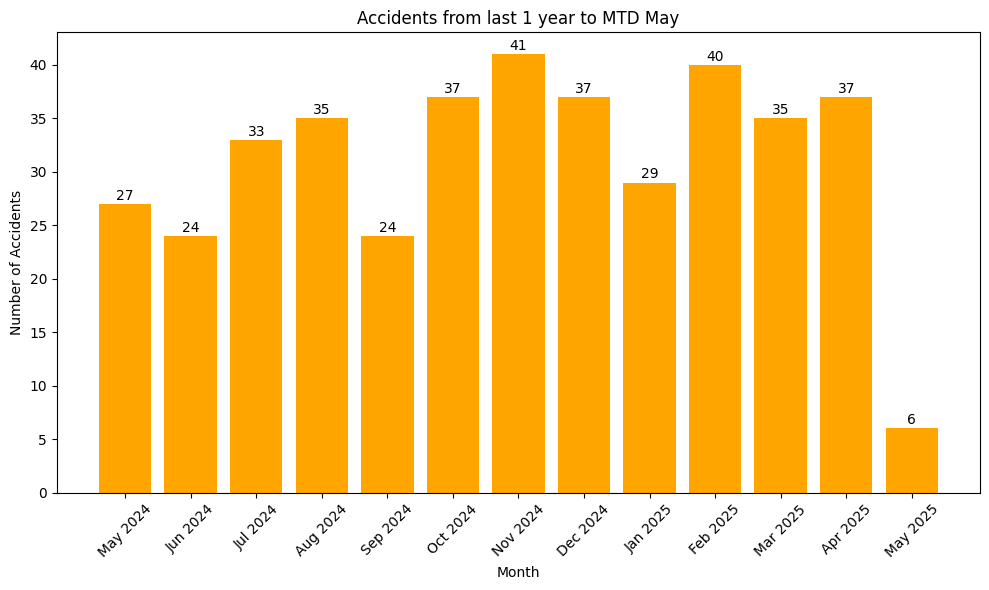

In [105]:


# Filter data for accidents within the specified date range
accident_data_filtered = accident_data[(accident_data['Incident Date'] >= '2024-05-01') & (accident_data['Incident Date'] <= '2025-05-31')]

# Group by month and count accidents
monthly_accidents = accident_data_filtered.groupby(accident_data_filtered['Incident Date'].dt.to_period('M'))['ID'].count()

# Convert the index to datetime objects for plotting
monthly_accidents.index = monthly_accidents.index.to_timestamp()

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_accidents.index.strftime('%b %Y'), monthly_accidents.values, color='orange')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Accidents from last 1 year to MTD May')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data.info(0)

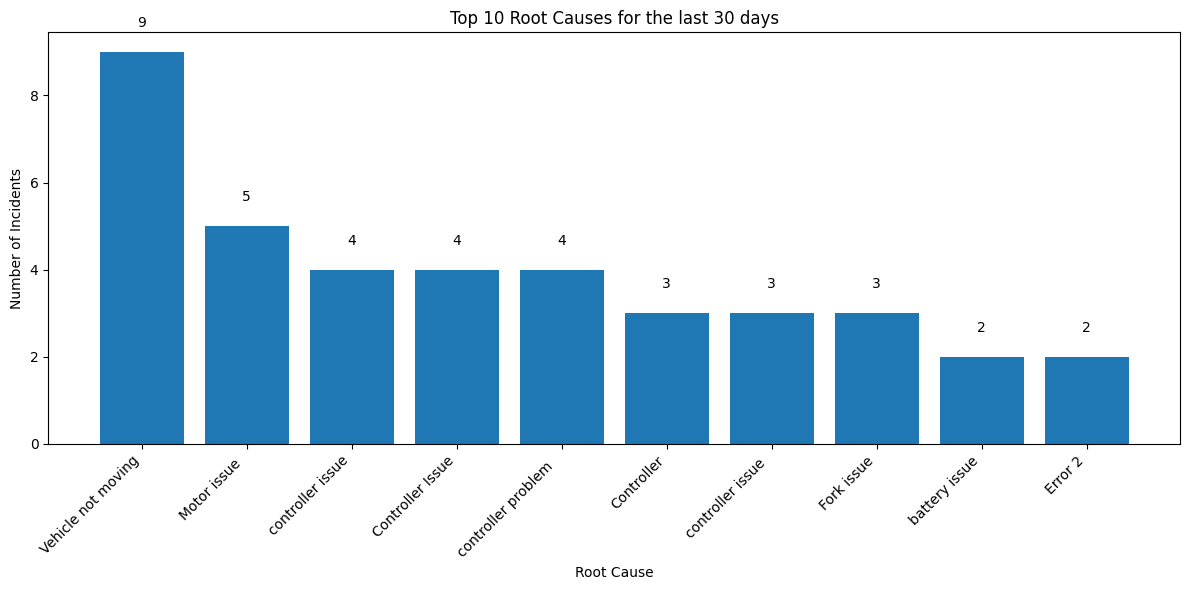

In [ ]:
# Top 10 values of root cause column fro last 30 days with data labels

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded and processed as in the previous code.
# Replace 'data' with the actual name of your DataFrame.

# Filter data for the last 30 days
end_date = pd.to_datetime('2024-12-6')  # Fixed end date
start_date = end_date - pd.DateOffset(days=30)
last_30_days_data = data[(data['Incident Date'] >= start_date) & (data['Incident Date'] <= end_date)]

# Group by 'Root cause' and count occurrences
root_cause_counts = last_30_days_data['Root cause'].value_counts().head(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(root_cause_counts.index, root_cause_counts.values)
plt.xlabel('Root Cause')
plt.ylabel('Number of Incidents')
plt.title('Top 10 Root Causes for the last 30 days')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

##COI v/s MMB case study

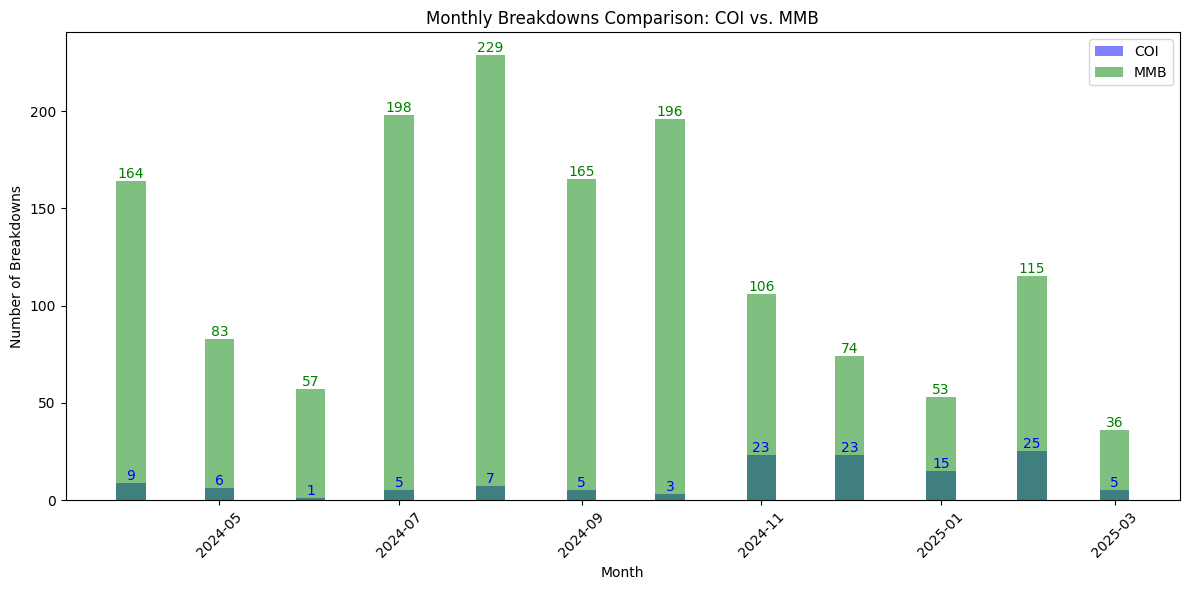

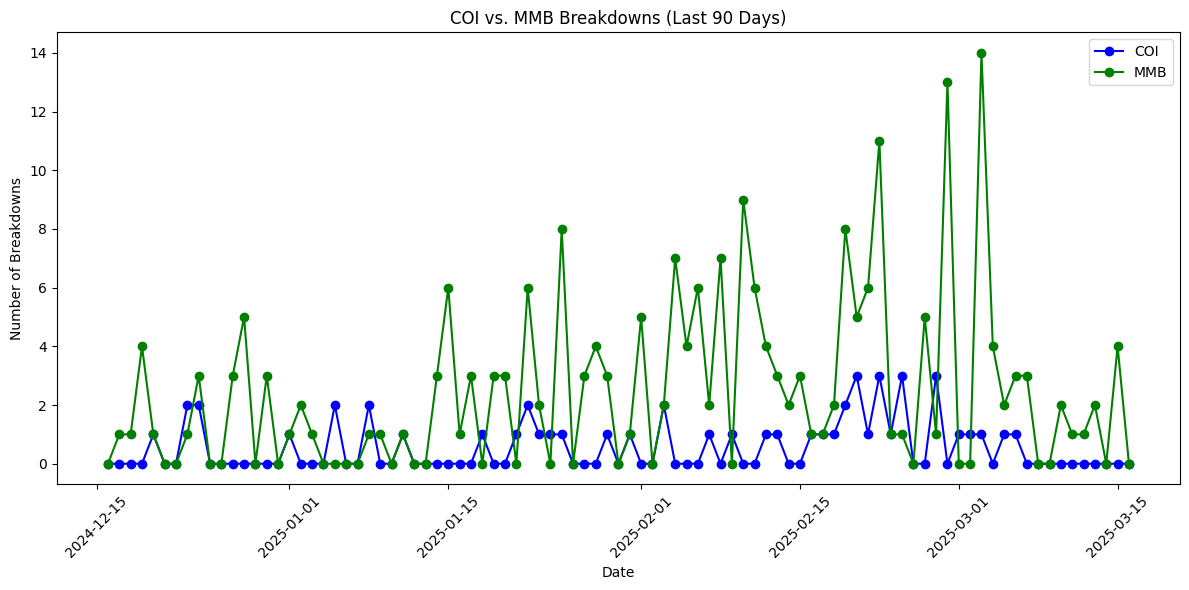

In [ ]:
#For COI and MMB perform comparison analysis and represent in form of graphs , with appropriate chart titles , data lables. Combine graphs and represent comparision with data labels


# Filter data for COI and MMB
coi_data = data[data['FON'] == 'COI']
mmb_data = data[data['FON'] == 'MMB']

# Group by month and count breakdowns for COI
coi_monthly_breakdowns = coi_data.groupby(coi_data['Incident Date'].dt.to_period('M'))['ID'].count()

# Group by month and count breakdowns for MMB
mmb_monthly_breakdowns = mmb_data.groupby(mmb_data['Incident Date'].dt.to_period('M'))['ID'].count()


# Convert the index to datetime objects for plotting
coi_monthly_breakdowns.index = coi_monthly_breakdowns.index.to_timestamp()
mmb_monthly_breakdowns.index = mmb_monthly_breakdowns.index.to_timestamp()

# Create the bar plot
plt.figure(figsize=(12, 6))

# Plot COI data
plt.bar(coi_monthly_breakdowns.index, coi_monthly_breakdowns.values, width=10, label='COI', color='blue', alpha=0.5)

# Plot MMB data
plt.bar(mmb_monthly_breakdowns.index, mmb_monthly_breakdowns.values, width=10, label='MMB', color='green', alpha=0.5)



# Add data labels for COI
for x, y in zip(coi_monthly_breakdowns.index, coi_monthly_breakdowns.values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='blue')

# Add data labels for MMB
for x, y in zip(mmb_monthly_breakdowns.index, mmb_monthly_breakdowns.values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='green')

# Customize chart
plt.xlabel('Month')
plt.ylabel('Number of Breakdowns')
plt.title('Monthly Breakdowns Comparison: COI vs. MMB')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Compare COI and MMB breakdowns over the last 90 days


end_date = pd.to_datetime('2025-03-16')
start_date = end_date - pd.DateOffset(days=90)


coi_last_90_days = coi_data[(coi_data['Incident Date'] >= start_date) & (coi_data['Incident Date'] <= end_date)]
mmb_last_90_days = mmb_data[(mmb_data['Incident Date'] >= start_date) & (mmb_data['Incident Date'] <= end_date)]

coi_daily_breakdowns = coi_last_90_days.groupby('Incident Date')['ID'].count()
mmb_daily_breakdowns = mmb_last_90_days.groupby('Incident Date')['ID'].count()

all_dates = pd.date_range(start=start_date, end=end_date)
coi_daily_breakdowns = coi_daily_breakdowns.reindex(all_dates, fill_value=0)
mmb_daily_breakdowns = mmb_daily_breakdowns.reindex(all_dates, fill_value=0)

plt.figure(figsize=(12, 6))

plt.plot(coi_daily_breakdowns.index, coi_daily_breakdowns.values, label='COI', marker='o', color='blue')
plt.plot(mmb_daily_breakdowns.index, mmb_daily_breakdowns.values, label='MMB', marker='o', color='green')

plt.xlabel('Date')
plt.ylabel('Number of Breakdowns')
plt.title('COI vs. MMB Breakdowns (Last 90 Days)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

